# Introduction to Pandas

Based on a series of tutorials by Chris Fonnesbeck: 

https://github.com/fonnesbeck/statistical-analysis-python-tutorial

Pandas provides a useful wrapper for tabular data, with lots of utilities for restructuring and analizing data.

http://pandas.pydata.org/pandas-docs/stable/

### Numpy

Pandas uses the numerical python (numpy) library under the hood.  Numpy is a very high-performance multi-dimensional interface to blocks of memory that can be accessed efficiently.  See the introduction to Numpy for background information.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

# Set some Pandas options
pd.set_option('html', False)
pd.set_option('max_columns', 30)
pd.set_option('max_rows', 20)

### Pandas Data Structures

### Series

A **Series** is a single vector of data (like a NumPy array) with an *index* that labels each element in the vector.

In [2]:
counts = pd.Series([632, 1638, 569, 115])
counts

0     632
1    1638
2     569
3     115
dtype: int64

If an index is not specified, a default sequence of integers is assigned as the index. A NumPy array comprises the values of the `Series`, while the index is a pandas `Index` object.

In [3]:
counts.values

array([ 632, 1638,  569,  115], dtype=int64)

In [4]:
counts.index

RangeIndex(start=0, stop=4, step=1)

We can assign meaningful labels to the index, if they are available:

In [5]:
top_grantmakers_2014 = pd.Series([3921403840, 1171857588, 964514537, 964514537], 
    index=['Bill & Melinda Gates Foundation', 'Schwab Charitable Fund', 'Silicon Valley Community Foundation', 'Gordon and Betty Moore Foundation'])
print (top_grantmakers_2014)

Bill & Melinda Gates Foundation        3921403840
Schwab Charitable Fund                 1171857588
Silicon Valley Community Foundation     964514537
Gordon and Betty Moore Foundation       964514537
dtype: int64


These labels can be used to refer to the values in the `Series`.

In [6]:
top_grantmakers_2014['Silicon Valley Community Foundation']

964514537

In [7]:
top_grantmakers_2014[[name.endswith('Fund') for name in top_grantmakers_2014.index]]

Schwab Charitable Fund    1171857588
dtype: int64

In [9]:
[name.endswith('Fund') for name in top_grantmakers_2014.index]

[False, True, False, False]

Notice that the indexing operation preserved the association between the values and the corresponding indices.

We can still use positional indexing if we wish.

In [10]:
top_grantmakers_2014[1]

1171857588

We can give both the array of values and the index meaningful labels themselves:

In [11]:
top_grantmakers_2014.name = 'Top Amounts'
top_grantmakers_2014.index.name = 'Grantmaker'
top_grantmakers_2014

Grantmaker
Bill & Melinda Gates Foundation        3921403840
Schwab Charitable Fund                 1171857588
Silicon Valley Community Foundation     964514537
Gordon and Betty Moore Foundation       964514537
Name: Top Amounts, dtype: int64

NumPy's math functions and other operations can be applied to Series without losing the data structure.

In [12]:
np.log(top_grantmakers_2014)

Grantmaker
Bill & Melinda Gates Foundation        22.089716
Schwab Charitable Fund                 20.881856
Silicon Valley Community Foundation    20.687135
Gordon and Betty Moore Foundation      20.687135
Name: Top Amounts, dtype: float64

We can also filter according to the values in the `Series`:

In [13]:
top_grantmakers_2014[top_grantmakers_2014>10**9]

Grantmaker
Bill & Melinda Gates Foundation    3921403840
Schwab Charitable Fund             1171857588
Name: Top Amounts, dtype: int64

A `Series` can be thought of as an ordered key-value store. In fact, we can create one from a `dict`:

In [14]:
top_gm_dict = {'Schwab Charitable Fund': 1171857588, 'Bill & Melinda Gates Foundation': 3921403840, 'Gordon and Betty Moore Foundation': 964514537, 'Silicon Valley Community Foundation': 964514537}
print(pd.Series(top_gm_dict))

Bill & Melinda Gates Foundation        3921403840
Gordon and Betty Moore Foundation       964514537
Schwab Charitable Fund                 1171857588
Silicon Valley Community Foundation     964514537
dtype: int64


Notice that the `Series` is created in key-sorted order.

If we pass a custom index to `Series`, it will select the corresponding values from the dict, and treat indices without corrsponding values as missing. Pandas uses the `NaN` (not a number) type for missing values.

In [15]:
top_gm_series = pd.Series(top_gm_dict, index=['Unknown', 'Bill & Melinda Gates Foundation','Schwab Charitable Fund','Silicon Valley Community Foundation','Gordon and Betty Moore Foundation'])
print(top_gm_series)

Unknown                                         NaN
Bill & Melinda Gates Foundation        3.921404e+09
Schwab Charitable Fund                 1.171858e+09
Silicon Valley Community Foundation    9.645145e+08
Gordon and Betty Moore Foundation      9.645145e+08
dtype: float64


In [16]:
top_gm_series.isnull()

Unknown                                 True
Bill & Melinda Gates Foundation        False
Schwab Charitable Fund                 False
Silicon Valley Community Foundation    False
Gordon and Betty Moore Foundation      False
dtype: bool

Critically, the labels are used to **align data** when used in operations with other Series objects:

In [17]:
top_gm_series + top_grantmakers_2014

Bill & Melinda Gates Foundation        7.842808e+09
Gordon and Betty Moore Foundation      1.929029e+09
Schwab Charitable Fund                 2.343715e+09
Silicon Valley Community Foundation    1.929029e+09
Unknown                                         NaN
dtype: float64

Contrast this with NumPy arrays, where arrays of the same length will combine values element-wise; adding Series combined values with the same label in the resulting series. Notice also that the missing values were propogated by addition.

### DataFrame

Inevitably, we want to be able to store, view and manipulate data that is *multivariate*, where for every index there are multiple fields or columns of data, often of varying data type.

A `DataFrame` is a tabular data structure, encapsulating multiple series like columns in a spreadsheet. Data are stored internally as a 2-dimensional object, but the `DataFrame` allows us to represent and manipulate higher-dimensional data.

In [18]:
df = pd.DataFrame({  'amount':[569092056, 538673007, 506235384, 467353105, 443120415],
                     'gm_state':['CA', 'CA', 'NY', 'NY', 'NY'],
                     'recip_state':['NJ', 'NY', 'MA', 'CA', 'DC']})
print(df)

      amount gm_state recip_state
0  569092056       CA          NJ
1  538673007       CA          NY
2  506235384       NY          MA
3  467353105       NY          CA
4  443120415       NY          DC


Notice the `DataFrame` is sorted by column name. We can change the order by indexing them in the order we desire:

In [19]:
df[['gm_state','recip_state','amount']]

  gm_state recip_state     amount
0       CA          NJ  569092056
1       CA          NY  538673007
2       NY          MA  506235384
3       NY          CA  467353105
4       NY          DC  443120415

A `DataFrame` has a second index, representing the columns:

In [20]:
df.columns

Index(['amount', 'gm_state', 'recip_state'], dtype='object')

If we wish to access columns, we can do so either by dict-like indexing or by attribute:

In [21]:
df['amount']

0    569092056
1    538673007
2    506235384
3    467353105
4    443120415
Name: amount, dtype: int64

In [22]:
df.amount

0    569092056
1    538673007
2    506235384
3    467353105
4    443120415
Name: amount, dtype: int64

In [23]:
type(df.amount)

pandas.core.series.Series

In [59]:
type(df[['amount']])

pandas.core.frame.DataFrame

Notice this is different than with `Series`, where dict-like indexing retrieved a particular element (row). If we want access to a row in a `DataFrame`, we index its `ix` attribute.


In [60]:
df.ix[3]

amount         467353105
gm_state              NY
recip_state           CA
Name: 3, dtype: object

Alternatively, we can create a `DataFrame` with a dict of dicts:

In [68]:
df = pd.DataFrame({0: {'gm_state': 'CA', 'phylum': 'NJ', 'amount': 569092056},
                    1: {'gm_state': 'CA', 'phylum': 'NY', 'amount': 538673007},
                    2: {'gm_state': 'NY', 'phylum': 'MA', 'amount': 506235384},
                    3: {'gm_state': 'NY', 'phylum': 'CA', 'amount': 467353105},
                    4: {'gm_state': 'NY', 'phylum': 'DC', 'amount': 443120415}})
print (df)

                  0          1          2          3          4
amount    569092056  538673007  506235384  467353105  443120415
gm_state         CA         CA         NY         NY         NY
phylum           NJ         NY         MA         CA         DC


We probably want this transposed:

In [63]:
df = df.T
df

      amount gm_state phylum
0  569092056       CA     NJ
1  538673007       CA     NY
2  506235384       NY     MA
3  467353105       NY     CA
4  443120415       NY     DC

Its important to note that the Series returned when a DataFrame is indexed is merely a **view** on the DataFrame, and not a copy of the data itself. So you must be cautious when manipulating this data:

In [65]:
vals = df.amount
vals

0    569092056
1    538673007
2    506235384
3    467353105
4    443120415
Name: amount, dtype: object

In [66]:
vals[4] = 0
vals

0    569092056
1    538673007
2    506235384
3    467353105
4            0
Name: amount, dtype: object

In [67]:
df

      amount gm_state phylum
0  569092056       CA     NJ
1  538673007       CA     NY
2  506235384       NY     MA
3  467353105       NY     CA
4          0       NY     DC

In [73]:
df = pd.DataFrame({0: {'gm_state': 'CA', 'phylum': 'NJ', 'amount': 569092056},
                    1: {'gm_state': 'CA', 'phylum': 'NY', 'amount': 538673007},
                    2: {'gm_state': 'NY', 'phylum': 'MA', 'amount': 506235384},
                    3: {'gm_state': 'NY', 'phylum': 'CA', 'amount': 467353105},
                    4: {'gm_state': 'NY', 'phylum': 'DC', 'amount': 443120415}})
df = df.T
vals = df.amount.copy()
vals[4] = 0
print(df)
print(vals)

      amount gm_state phylum
0  569092056       CA     NJ
1  538673007       CA     NY
2  506235384       NY     MA
3  467353105       NY     CA
4  443120415       NY     DC
0    569092056
1    538673007
2    506235384
3    467353105
4            0
Name: amount, dtype: object


We can create or modify columns by assignment:

In [74]:
df.amount[3] = 10000
df

      amount gm_state phylum
0  569092056       CA     NJ
1  538673007       CA     NY
2  506235384       NY     MA
3      10000       NY     CA
4  443120415       NY     DC

In [75]:
df['gm_state'] = 'MN'
df

      amount gm_state phylum
0  569092056       MN     NJ
1  538673007       MN     NY
2  506235384       MN     MA
3      10000       MN     CA
4  443120415       MN     DC

But note, we cannot use the attribute indexing method to add a new column:

In [35]:
data.treatment = 1
data

  patient          phylum value  year
0       1      Firmicutes   632  2013
1       1  Proteobacteria  1638  2013
2       1  Actinobacteria   569  2013
3       1   Bacteroidetes    14  2013
4       2      Firmicutes   433  2013
5       2  Proteobacteria     0  2013
6       2  Actinobacteria   754  2013
7       2   Bacteroidetes   555  2013

In [36]:
data.treatment

1

Specifying a `Series` as a new columns cause its values to be added according to the `DataFrame`'s index:

In [37]:
treatment = pd.Series([0]*4 + [1]*2)
treatment

0    0
1    0
2    0
3    0
4    1
5    1
dtype: int64

In [38]:
data['treatment'] = treatment
data

  patient          phylum value  year  treatment
0       1      Firmicutes   632  2013          0
1       1  Proteobacteria  1638  2013          0
2       1  Actinobacteria   569  2013          0
3       1   Bacteroidetes    14  2013          0
4       2      Firmicutes   433  2013          1
5       2  Proteobacteria     0  2013          1
6       2  Actinobacteria   754  2013        NaN
7       2   Bacteroidetes   555  2013        NaN

Other Python data structures (ones without an index) need to be the same length as the `DataFrame`:

In [39]:
month = ['Jan', 'Feb', 'Mar', 'Apr']
data['month'] = month

ValueError: Length of values does not match length of index

In [40]:
data['month'] = ['Jan']*len(data)
data

  patient          phylum value  year  treatment month
0       1      Firmicutes   632  2013          0   Jan
1       1  Proteobacteria  1638  2013          0   Jan
2       1  Actinobacteria   569  2013          0   Jan
3       1   Bacteroidetes    14  2013          0   Jan
4       2      Firmicutes   433  2013          1   Jan
5       2  Proteobacteria     0  2013          1   Jan
6       2  Actinobacteria   754  2013        NaN   Jan
7       2   Bacteroidetes   555  2013        NaN   Jan

We can use `del` to remove columns, in the same way `dict` entries can be removed:

In [41]:
del data['month']
data

  patient          phylum value  year  treatment
0       1      Firmicutes   632  2013          0
1       1  Proteobacteria  1638  2013          0
2       1  Actinobacteria   569  2013          0
3       1   Bacteroidetes    14  2013          0
4       2      Firmicutes   433  2013          1
5       2  Proteobacteria     0  2013          1
6       2  Actinobacteria   754  2013        NaN
7       2   Bacteroidetes   555  2013        NaN

We can extract the underlying data as a simple `ndarray` by accessing the `values` attribute:

In [42]:
data.values

array([[1, 'Firmicutes', 632, 2013, 0.0],
       [1, 'Proteobacteria', 1638, 2013, 0.0],
       [1, 'Actinobacteria', 569, 2013, 0.0],
       [1, 'Bacteroidetes', 14, 2013, 0.0],
       [2, 'Firmicutes', 433, 2013, 1.0],
       [2, 'Proteobacteria', 0, 2013, 1.0],
       [2, 'Actinobacteria', 754, 2013, nan],
       [2, 'Bacteroidetes', 555, 2013, nan]], dtype=object)

Notice that because of the mix of string and integer (and `NaN`) values, the dtype of the array is `object`. The dtype will automatically be chosen to be as general as needed to accomodate all the columns.

In [43]:
df = pd.DataFrame({'foo': [1,2,3], 'bar':[0.4, -1.0, 4.5]})
df.values

array([[ 0.4,  1. ],
       [-1. ,  2. ],
       [ 4.5,  3. ]])

Pandas uses a custom data structure to represent the indices of Series and DataFrames.

In [44]:
data.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')

Index objects are immutable:

In [45]:
data.index[0] = 15

TypeError: '<class 'pandas.core.index.Int64Index'>' does not support mutable operations.

This is so that Index objects can be shared between data structures without fear that they will be changed.

In [46]:
bacteria2.index = bacteria.index

In [47]:
bacteria2

phylum
Firmicutes         NaN
Proteobacteria     632
Actinobacteria    1638
Bacteroidetes      569
dtype: float64

## Importing data

A key, but often under-appreciated, step in data analysis is importing the data that we wish to analyze. Though it is easy to load basic data structures into Python using built-in tools or those provided by packages like NumPy, it is non-trivial to import structured data well, and to easily convert this input into a robust data structure:

    genes = np.loadtxt("genes.csv", delimiter=",", dtype=[('gene', '|S10'), ('value', '<f4')])

Pandas provides a convenient set of functions for importing tabular data in a number of formats directly into a `DataFrame` object. These functions include a slew of options to perform type inference, indexing, parsing, iterating and cleaning automatically as data are imported.

Let's start with some more bacteria data, stored in csv format.

In [48]:
!cat data/microbiome.csv

Taxon,Patient,Tissue,Stool
Firmicutes,1,632,305
Firmicutes,2,136,4182
Firmicutes,3,1174,703
Firmicutes,4,408,3946
Firmicutes,5,831,8605
Firmicutes,6,693,50
Firmicutes,7,718,717
Firmicutes,8,173,33
Firmicutes,9,228,80
Firmicutes,10,162,3196
Firmicutes,11,372,32
Firmicutes,12,4255,4361
Firmicutes,13,107,1667
Firmicutes,14,96,223
Firmicutes,15,281,2377
Proteobacteria,1,1638,3886
Proteobacteria,2,2469,1821
Proteobacteria,3,839,661
Proteobacteria,4,4414,18
Proteobacteria,5,12044,83
Proteobacteria,6,2310,12
Proteobacteria,7,3053,547
Proteobacteria,8,395,2174
Proteobacteria,9,2651,767
Proteobacteria,10,1195,76
Proteobacteria,11,6857,795
Proteobacteria,12,483,666
Proteobacteria,13,2950,3994
Proteobacteria,14,1541,816
Proteobacteria,15,1307,53
Actinobacteria,1,569,648
Actinobacteria,2,1590,4
Actinobacteria,3,25,2
Actinobacteria,4,259,300
Actinobacteria,5,568,7
Actinobacteria,6,1102,9
Actinobacteria,7,678,377
Actinobacteria,8,260,58
Actinobacteria,9,424,233
Actinobacteria,10,548,21
Actinobacteri

This table can be read into a DataFrame using `read_csv`:

In [49]:
mb = pd.read_csv("data/microbiome.csv")
mb

         Taxon  Patient  Tissue  Stool
0   Firmicutes        1     632    305
1   Firmicutes        2     136   4182
2   Firmicutes        3    1174    703
3   Firmicutes        4     408   3946
4   Firmicutes        5     831   8605
5   Firmicutes        6     693     50
6   Firmicutes        7     718    717
7   Firmicutes        8     173     33
8   Firmicutes        9     228     80
9   Firmicutes       10     162   3196
..         ...      ...     ...    ...
65       Other        6     116      0
66       Other        7     527     12
67       Other        8     357     11
68       Other        9     106     11
69       Other       10      67     14
70       Other       11     203      6
71       Other       12     392      6
72       Other       13      28     25
73       Other       14      12     22
74       Other       15     305     32

[75 rows x 4 columns]

Notice that `read_csv` automatically considered the first row in the file to be a header row.

We can override default behavior by customizing some the arguments, like `header`, `names` or `index_col`.

In [50]:
pd.read_csv("data/microbiome.csv", header=None).head()

            0        1       2      3
0       Taxon  Patient  Tissue  Stool
1  Firmicutes        1     632    305
2  Firmicutes        2     136   4182
3  Firmicutes        3    1174    703
4  Firmicutes        4     408   3946

`read_csv` is just a convenience function for `read_table`, since csv is such a common format:

In [51]:
mb = pd.read_table("data/microbiome.csv", sep=',')

The `sep` argument can be customized as needed to accomodate arbitrary separators. For example, we can use a regular expression to define a variable amount of whitespace, which is unfortunately very common in some data formats: 
    
    sep='\s+'

For a more useful index, we can specify the first two columns, which together provide a unique index to the data.

In [52]:
mb = pd.read_csv("data/microbiome.csv", index_col=['Taxon','Patient'])
mb.head()

                    Tissue  Stool
Taxon      Patient               
Firmicutes 1           632    305
           2           136   4182
           3          1174    703
           4           408   3946
           5           831   8605

This is called a *hierarchical* index, which we will revisit later in the tutorial.

If we have sections of data that we do not wish to import (for example, known bad data), we can populate the `skiprows` argument:

In [53]:
pd.read_csv("data/microbiome.csv", skiprows=[3,4,6]).head()

        Taxon  Patient  Tissue  Stool
0  Firmicutes        1     632    305
1  Firmicutes        2     136   4182
2  Firmicutes        5     831   8605
3  Firmicutes        7     718    717
4  Firmicutes        8     173     33

Conversely, if we only want to import a small number of rows from, say, a very large data file we can use `nrows`:

In [54]:
pd.read_csv("data/microbiome.csv", nrows=4)

        Taxon  Patient  Tissue  Stool
0  Firmicutes        1     632    305
1  Firmicutes        2     136   4182
2  Firmicutes        3    1174    703
3  Firmicutes        4     408   3946

Alternately, if we want to process our data in reasonable chunks, the `chunksize` argument will return an iterable object that can be employed in a data processing loop. For example, our microbiome data are organized by bacterial phylum, with 15 patients represented in each:

In [55]:
data_chunks = pd.read_csv("data/microbiome.csv", chunksize=15)

mean_tissue = {chunk.Taxon[0]:chunk.Tissue.mean() for chunk in data_chunks}
    
mean_tissue

{'Actinobacteria': 449.06666666666666,
 'Bacteroidetes': 599.66666666666663,
 'Firmicutes': 684.39999999999998,
 'Other': 198.80000000000001,
 'Proteobacteria': 2943.0666666666666}

Most real-world data is incomplete, with values missing due to incomplete observation, data entry or transcription error, or other reasons. Pandas will automatically recognize and parse common missing data indicators, including `NA` and `NULL`.

In [56]:
!cat data/microbiome_missing.csv

Taxon,Patient,Tissue,Stool
Firmicutes,1,632,305
Firmicutes,2,136,4182
Firmicutes,3,,703
Firmicutes,4,408,3946
Firmicutes,5,831,8605
Firmicutes,6,693,50
Firmicutes,7,718,717
Firmicutes,8,173,33
Firmicutes,9,228,NA
Firmicutes,10,162,3196
Firmicutes,11,372,-99999
Firmicutes,12,4255,4361
Firmicutes,13,107,1667
Firmicutes,14,?,223
Firmicutes,15,281,2377
Proteobacteria,1,1638,3886
Proteobacteria,2,2469,1821
Proteobacteria,3,839,661
Proteobacteria,4,4414,18
Proteobacteria,5,12044,83
Proteobacteria,6,2310,12
Proteobacteria,7,3053,547
Proteobacteria,8,395,2174
Proteobacteria,9,2651,767
Proteobacteria,10,1195,76
Proteobacteria,11,6857,795
Proteobacteria,12,483,666
Proteobacteria,13,2950,3994
Proteobacteria,14,1541,816
Proteobacteria,15,1307,53
Actinobacteria,1,569,648
Actinobacteria,2,1590,4
Actinobacteria,3,25,2
Actinobacteria,4,259,300
Actinobacteria,5,568,7
Actinobacteria,6,1102,9
Actinobacteria,7,678,377
Actinobacteria,8,260,58
Actinobacteria,9,424,233
Actinobacteria,10,548,21
Actinobacteria

In [57]:
pd.read_csv("data/microbiome_missing.csv").head(20)

             Taxon  Patient Tissue  Stool
0       Firmicutes        1    632    305
1       Firmicutes        2    136   4182
2       Firmicutes        3    NaN    703
3       Firmicutes        4    408   3946
4       Firmicutes        5    831   8605
5       Firmicutes        6    693     50
6       Firmicutes        7    718    717
7       Firmicutes        8    173     33
8       Firmicutes        9    228    NaN
9       Firmicutes       10    162   3196
10      Firmicutes       11    372 -99999
11      Firmicutes       12   4255   4361
12      Firmicutes       13    107   1667
13      Firmicutes       14      ?    223
14      Firmicutes       15    281   2377
15  Proteobacteria        1   1638   3886
16  Proteobacteria        2   2469   1821
17  Proteobacteria        3    839    661
18  Proteobacteria        4   4414     18
19  Proteobacteria        5  12044     83

Above, Pandas recognized `NA` and an empty field as missing data.

In [58]:
pd.isnull(pd.read_csv("data/microbiome_missing.csv")).head(20)

    Taxon Patient Tissue  Stool
0   False   False  False  False
1   False   False  False  False
2   False   False   True  False
3   False   False  False  False
4   False   False  False  False
5   False   False  False  False
6   False   False  False  False
7   False   False  False  False
8   False   False  False   True
9   False   False  False  False
10  False   False  False  False
11  False   False  False  False
12  False   False  False  False
13  False   False  False  False
14  False   False  False  False
15  False   False  False  False
16  False   False  False  False
17  False   False  False  False
18  False   False  False  False
19  False   False  False  False

Unfortunately, there will sometimes be inconsistency with the conventions for missing data. In this example, there is a question mark "?" and a large negative number where there should have been a positive integer. We can specify additional symbols with the `na_values` argument:
   

In [59]:
pd.read_csv("data/microbiome_missing.csv", na_values=['?', -99999]).head(20)

             Taxon  Patient  Tissue  Stool
0       Firmicutes        1     632    305
1       Firmicutes        2     136   4182
2       Firmicutes        3     NaN    703
3       Firmicutes        4     408   3946
4       Firmicutes        5     831   8605
5       Firmicutes        6     693     50
6       Firmicutes        7     718    717
7       Firmicutes        8     173     33
8       Firmicutes        9     228    NaN
9       Firmicutes       10     162   3196
10      Firmicutes       11     372    NaN
11      Firmicutes       12    4255   4361
12      Firmicutes       13     107   1667
13      Firmicutes       14     NaN    223
14      Firmicutes       15     281   2377
15  Proteobacteria        1    1638   3886
16  Proteobacteria        2    2469   1821
17  Proteobacteria        3     839    661
18  Proteobacteria        4    4414     18
19  Proteobacteria        5   12044     83

These can be specified on a column-wise basis using an appropriate dict as the argument for `na_values`.

### Microsoft Excel

Since so much financial and scientific data ends up in Excel spreadsheets (regrettably), Pandas' ability to directly import Excel spreadsheets is valuable. This support is contingent on having one or two dependencies (depending on what version of Excel file is being imported) installed: `xlrd` and `openpyxl` (these may be installed with either `pip` or `easy_install`).

Importing Excel data to Pandas is a two-step process. First, we create an `ExcelFile` object using the path of the file:                                             

In [60]:
mb_file = pd.ExcelFile('data/microbiome/MID1.xls')
mb_file

Then, since modern spreadsheets consist of one or more "sheets", we parse the sheet with the data of interest:

In [61]:
mb1 = mb_file.parse("Sheet 1", header=None)
mb1.columns = ["Taxon", "Count"]
mb1.head()

                                               Taxon  Count
0  Archaea "Crenarchaeota" Thermoprotei Desulfuro...      7
1  Archaea "Crenarchaeota" Thermoprotei Desulfuro...      2
2  Archaea "Crenarchaeota" Thermoprotei Sulfoloba...      3
3  Archaea "Crenarchaeota" Thermoprotei Thermopro...      3
4  Archaea "Euryarchaeota" "Methanomicrobia" Meth...      7

There is now a `read_excel` conveneince function in Pandas that combines these steps into a single call:

In [62]:
mb2 = pd.read_excel('data/microbiome/MID2.xls', sheetname='Sheet 1', header=None)
mb2.head()

                                                   0   1
0  Archaea "Crenarchaeota" Thermoprotei Acidiloba...   2
1  Archaea "Crenarchaeota" Thermoprotei Acidiloba...  14
2  Archaea "Crenarchaeota" Thermoprotei Desulfuro...  23
3  Archaea "Crenarchaeota" Thermoprotei Desulfuro...   1
4  Archaea "Crenarchaeota" Thermoprotei Desulfuro...   2

There are several other data formats that can be imported into Python and converted into DataFrames, with the help of buitl-in or third-party libraries. These include JSON, XML, HDF5, relational and non-relational databases, and various web APIs. These are beyond the scope of this tutorial, but are covered in [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do).

## Pandas Fundamentals

This section introduces the new user to the key functionality of Pandas that is required to use the software effectively.

For some variety, we will leave our digestive tract bacteria behind and employ some baseball data.

In [63]:
baseball = pd.read_csv("data/baseball.csv", index_col='id')
baseball.head()

          player  year  stint team  lg   g  ab  r   h  X2b  X3b  hr  rbi  sb  \
id                                                                             
88641  womacto01  2006      2  CHN  NL  19  50  6  14    1    0   1    2   1   
88643  schilcu01  2006      1  BOS  AL  31   2  0   1    0    0   0    0   0   
88645  myersmi01  2006      1  NYA  AL  62   0  0   0    0    0   0    0   0   
88649  helliri01  2006      1  MIL  NL  20   3  0   0    0    0   0    0   0   
88650  johnsra05  2006      1  NYA  AL  33   6  0   1    0    0   0    0   0   

       cs  bb  so  ibb  hbp  sh  sf  gidp  
id                                         
88641   1   4   4    0    0   3   0     0  
88643   0   0   1    0    0   0   0     0  
88645   0   0   0    0    0   0   0     0  
88649   0   0   2    0    0   0   0     0  
88650   0   0   4    0    0   0   0     0  

Notice that we specified the `id` column as the index, since it appears to be a unique identifier. We could try to create a unique index ourselves by combining `player` and `year`:

In [64]:
player_id = baseball.player + baseball.year.astype(str)
baseball_newind = baseball.copy()
baseball_newind.index = player_id
baseball_newind.head()

                  player  year  stint team  lg   g  ab  r   h  X2b  X3b  hr  \
womacto012006  womacto01  2006      2  CHN  NL  19  50  6  14    1    0   1   
schilcu012006  schilcu01  2006      1  BOS  AL  31   2  0   1    0    0   0   
myersmi012006  myersmi01  2006      1  NYA  AL  62   0  0   0    0    0   0   
helliri012006  helliri01  2006      1  MIL  NL  20   3  0   0    0    0   0   
johnsra052006  johnsra05  2006      1  NYA  AL  33   6  0   1    0    0   0   

               rbi  sb  cs  bb  so  ibb  hbp  sh  sf  gidp  
womacto012006    2   1   1   4   4    0    0   3   0     0  
schilcu012006    0   0   0   0   1    0    0   0   0     0  
myersmi012006    0   0   0   0   0    0    0   0   0     0  
helliri012006    0   0   0   0   2    0    0   0   0     0  
johnsra052006    0   0   0   0   4    0    0   0   0     0  

This looks okay, but let's check:

In [65]:
baseball_newind.index.is_unique

False

So, indices need not be unique. Our choice is not unique because some players change teams within years.

In [66]:
pd.Series(baseball_newind.index).value_counts()

wickmbo012007    2
gomezch022007    2
sweenma012007    2
claytro012007    2
hernaro012007    2
loftoke012007    2
trachst012007    2
wellsda012007    2
...
myersmi012007    1
alomasa022007    1
edmonji012007    1
sheffga012007    1
whiteri012007    1
cormirh012007    1
floydcl012007    1
embreal012007    1
Length: 88, dtype: int64

The most important consequence of a non-unique index is that indexing by label will return multiple values for some labels:

In [67]:
baseball_newind.ix['wickmbo012007']

                  player  year  stint team  lg   g  ab  r  h  X2b  X3b  hr  \
wickmbo012007  wickmbo01  2007      2  ARI  NL   8   0  0  0    0    0   0   
wickmbo012007  wickmbo01  2007      1  ATL  NL  47   0  0  0    0    0   0   

               rbi  sb  cs  bb  so  ibb  hbp  sh  sf  gidp  
wickmbo012007    0   0   0   0   0    0    0   0   0     0  
wickmbo012007    0   0   0   0   0    0    0   0   0     0  

We will learn more about indexing below.

We can create a truly unique index by combining `player`, `team` and `year`:

In [68]:
player_unique = baseball.player + baseball.team + baseball.year.astype(str)
baseball_newind = baseball.copy()
baseball_newind.index = player_unique
baseball_newind.head()

                     player  year  stint team  lg   g  ab  r   h  X2b  X3b  \
womacto01CHN2006  womacto01  2006      2  CHN  NL  19  50  6  14    1    0   
schilcu01BOS2006  schilcu01  2006      1  BOS  AL  31   2  0   1    0    0   
myersmi01NYA2006  myersmi01  2006      1  NYA  AL  62   0  0   0    0    0   
helliri01MIL2006  helliri01  2006      1  MIL  NL  20   3  0   0    0    0   
johnsra05NYA2006  johnsra05  2006      1  NYA  AL  33   6  0   1    0    0   

                  hr  rbi  sb  cs  bb  so  ibb  hbp  sh  sf  gidp  
womacto01CHN2006   1    2   1   1   4   4    0    0   3   0     0  
schilcu01BOS2006   0    0   0   0   0   1    0    0   0   0     0  
myersmi01NYA2006   0    0   0   0   0   0    0    0   0   0     0  
helliri01MIL2006   0    0   0   0   0   2    0    0   0   0     0  
johnsra05NYA2006   0    0   0   0   0   4    0    0   0   0     0  

In [69]:
baseball_newind.index.is_unique

True

We can create meaningful indices more easily using a hierarchical index; for now, we will stick with the numeric `id` field as our index.

### Manipulating indices

**Reindexing** allows users to manipulate the data labels in a DataFrame. It forces a DataFrame to conform to the new index, and optionally, fill in missing data if requested.

A simple use of `reindex` is to alter the order of the rows:

In [70]:
baseball.reindex(baseball.index[::-1]).head()

          player  year  stint team  lg    g   ab   r    h  X2b  X3b  hr  rbi  \
id                                                                             
89534  alomasa02  2007      1  NYN  NL    8   22   1    3    1    0   0    0   
89533   aloumo01  2007      1  NYN  NL   87  328  51  112   19    1  13   49   
89530  ausmubr01  2007      1  HOU  NL  117  349  38   82   16    3   3   25   
89526  benitar01  2007      1  SFN  NL   19    0   0    0    0    0   0    0   
89525  benitar01  2007      2  FLO  NL   34    0   0    0    0    0   0    0   

       sb  cs  bb  so  ibb  hbp  sh  sf  gidp  
id                                             
89534   0   0   0   3    0    0   0   0     0  
89533   3   0  27  30    5    2   0   3    13  
89530   6   1  37  74    3    6   4   1    11  
89526   0   0   0   0    0    0   0   0     0  
89525   0   0   0   0    0    0   0   0     0  

Notice that the `id` index is not sequential. Say we wanted to populate the table with every `id` value. We could specify and index that is a sequence from the first to the last `id` numbers in the database, and Pandas would fill in the missing data with `NaN` values:

In [71]:
id_range = range(baseball.index.values.min(), baseball.index.values.max())
baseball.reindex(id_range).head()

          player  year  stint team   lg   g  ab   r   h  X2b  X3b  hr  rbi  \
88641  womacto01  2006      2  CHN   NL  19  50   6  14    1    0   1    2   
88642        NaN   NaN    NaN  NaN  NaN NaN NaN NaN NaN  NaN  NaN NaN  NaN   
88643  schilcu01  2006      1  BOS   AL  31   2   0   1    0    0   0    0   
88644        NaN   NaN    NaN  NaN  NaN NaN NaN NaN NaN  NaN  NaN NaN  NaN   
88645  myersmi01  2006      1  NYA   AL  62   0   0   0    0    0   0    0   

       sb  cs  bb  so  ibb  hbp  sh  sf  gidp  
88641   1   1   4   4    0    0   3   0     0  
88642 NaN NaN NaN NaN  NaN  NaN NaN NaN   NaN  
88643   0   0   0   1    0    0   0   0     0  
88644 NaN NaN NaN NaN  NaN  NaN NaN NaN   NaN  
88645   0   0   0   0    0    0   0   0     0  

Missing values can be filled as desired, either with selected values, or by rule:

In [72]:
baseball.reindex(id_range, method='ffill', columns=['player','year']).head()

          player  year
88641  womacto01  2006
88642  womacto01  2006
88643  schilcu01  2006
88644  schilcu01  2006
88645  myersmi01  2006

In [73]:
baseball.reindex(id_range, fill_value='mr.nobody', columns=['player']).head()

          player
88641  womacto01
88642  mr.nobody
88643  schilcu01
88644  mr.nobody
88645  myersmi01

Keep in mind that `reindex` does not work if we pass a non-unique index series.

We can remove rows or columns via the `drop` method:

In [74]:
baseball.shape

(100, 22)

In [75]:
baseball.drop([89525, 89526])

          player  year  stint team  lg    g   ab   r    h  X2b  X3b  hr  rbi  \
id                                                                             
88641  womacto01  2006      2  CHN  NL   19   50   6   14    1    0   1    2   
88643  schilcu01  2006      1  BOS  AL   31    2   0    1    0    0   0    0   
88645  myersmi01  2006      1  NYA  AL   62    0   0    0    0    0   0    0   
88649  helliri01  2006      1  MIL  NL   20    3   0    0    0    0   0    0   
88650  johnsra05  2006      1  NYA  AL   33    6   0    1    0    0   0    0   
88652  finlest01  2006      1  SFN  NL  139  426  66  105   21   12   6   40   
88653  gonzalu01  2006      1  ARI  NL  153  586  93  159   52    2  15   73   
88662   seleaa01  2006      1  LAN  NL   28   26   2    5    1    0   0    0   
89177  francju01  2007      2  ATL  NL   15   40   1   10    3    0   0    8   
89178  francju01  2007      1  NYN  NL   40   50   7   10    0    0   1    8   
...          ...   ...    ...  ...  ..  

In [76]:
baseball.drop(['ibb','hbp'], axis=1)

          player  year  stint team  lg    g   ab   r    h  X2b  X3b  hr  rbi  \
id                                                                             
88641  womacto01  2006      2  CHN  NL   19   50   6   14    1    0   1    2   
88643  schilcu01  2006      1  BOS  AL   31    2   0    1    0    0   0    0   
88645  myersmi01  2006      1  NYA  AL   62    0   0    0    0    0   0    0   
88649  helliri01  2006      1  MIL  NL   20    3   0    0    0    0   0    0   
88650  johnsra05  2006      1  NYA  AL   33    6   0    1    0    0   0    0   
88652  finlest01  2006      1  SFN  NL  139  426  66  105   21   12   6   40   
88653  gonzalu01  2006      1  ARI  NL  153  586  93  159   52    2  15   73   
88662   seleaa01  2006      1  LAN  NL   28   26   2    5    1    0   0    0   
89177  francju01  2007      2  ATL  NL   15   40   1   10    3    0   0    8   
89178  francju01  2007      1  NYN  NL   40   50   7   10    0    0   1    8   
...          ...   ...    ...  ...  ..  

## Indexing and Selection

Indexing works analogously to indexing in NumPy arrays, except we can use the labels in the `Index` object to extract values in addition to arrays of integers.

In [77]:
# Sample Series object
hits = baseball_newind.h
hits

womacto01CHN2006     14
schilcu01BOS2006      1
myersmi01NYA2006      0
helliri01MIL2006      0
johnsra05NYA2006      1
finlest01SFN2006    105
gonzalu01ARI2006    159
seleaa01LAN2006       5
...
cirilje01MIN2007     40
bondsba01SFN2007     94
biggicr01HOU2007    130
benitar01FLO2007      0
benitar01SFN2007      0
ausmubr01HOU2007     82
aloumo01NYN2007     112
alomasa02NYN2007      3
Name: h, Length: 100, dtype: int64

In [78]:
# Numpy-style indexing
hits[:3]

womacto01CHN2006    14
schilcu01BOS2006     1
myersmi01NYA2006     0
Name: h, dtype: int64

In [79]:
# Indexing by label
hits[['womacto01CHN2006','schilcu01BOS2006']]

womacto01CHN2006    14
schilcu01BOS2006     1
Name: h, dtype: int64

We can also slice with data labels, since they have an intrinsic order within the Index:

In [80]:
hits['womacto01CHN2006':'gonzalu01ARI2006']

womacto01CHN2006     14
schilcu01BOS2006      1
myersmi01NYA2006      0
helliri01MIL2006      0
johnsra05NYA2006      1
finlest01SFN2006    105
gonzalu01ARI2006    159
Name: h, dtype: int64

In [81]:
hits['womacto01CHN2006':'gonzalu01ARI2006'] = 5
hits

womacto01CHN2006    5
schilcu01BOS2006    5
myersmi01NYA2006    5
helliri01MIL2006    5
johnsra05NYA2006    5
finlest01SFN2006    5
gonzalu01ARI2006    5
seleaa01LAN2006     5
...
cirilje01MIN2007     40
bondsba01SFN2007     94
biggicr01HOU2007    130
benitar01FLO2007      0
benitar01SFN2007      0
ausmubr01HOU2007     82
aloumo01NYN2007     112
alomasa02NYN2007      3
Name: h, Length: 100, dtype: int64

In a `DataFrame` we can slice along either or both axes:

In [82]:
baseball_newind[['h','ab']]

                    h   ab
womacto01CHN2006    5   50
schilcu01BOS2006    5    2
myersmi01NYA2006    5    0
helliri01MIL2006    5    3
johnsra05NYA2006    5    6
finlest01SFN2006    5  426
gonzalu01ARI2006    5  586
seleaa01LAN2006     5   26
francju01ATL2007   10   40
francju01NYN2007   10   50
...               ...  ...
claytro01TOR2007   48  189
cirilje01ARI2007    8   40
cirilje01MIN2007   40  153
bondsba01SFN2007   94  340
biggicr01HOU2007  130  517
benitar01FLO2007    0    0
benitar01SFN2007    0    0
ausmubr01HOU2007   82  349
aloumo01NYN2007   112  328
alomasa02NYN2007    3   22

[100 rows x 2 columns]

In [83]:
baseball_newind[baseball_newind.ab>500]

                     player  year  stint team  lg    g   ab   r    h  X2b  \
gonzalu01ARI2006  gonzalu01  2006      1  ARI  NL  153  586  93    5   52   
vizquom01SFN2007  vizquom01  2007      1  SFN  NL  145  513  54  126   18   
thomafr04TOR2007  thomafr04  2007      1  TOR  AL  155  531  63  147   30   
rodriiv01DET2007  rodriiv01  2007      1  DET  AL  129  502  50  141   31   
griffke02CIN2007  griffke02  2007      1  CIN  NL  144  528  78  146   24   
delgaca01NYN2007  delgaca01  2007      1  NYN  NL  139  538  71  139   30   
biggicr01HOU2007  biggicr01  2007      1  HOU  NL  141  517  68  130   31   

                  X3b  hr  rbi  sb  cs  bb   so  ibb  hbp  sh  sf  gidp  
gonzalu01ARI2006    2  15   73   0   1  69   58   10    7   0   6    14  
vizquom01SFN2007    3   4   51  14   6  44   48    6    1  14   3    14  
thomafr04TOR2007    0  26   95   0   0  81   94    3    7   0   5    14  
rodriiv01DET2007    3  11   63   2   2   9   96    1    1   1   2    16  
griffke02CIN2

The indexing field `ix` allows us to select subsets of rows and columns in an intuitive way:

In [84]:
baseball_newind.ix['gonzalu01ARI2006', ['h','X2b', 'X3b', 'hr']]

h       5
X2b    52
X3b     2
hr     15
Name: gonzalu01ARI2006, dtype: object

In [85]:
baseball_newind.ix[['gonzalu01ARI2006','finlest01SFN2006'], 5:8]

                    g   ab   r
gonzalu01ARI2006  153  586  93
finlest01SFN2006  139  426  66

In [86]:
baseball_newind.ix[:'myersmi01NYA2006', 'hr']

womacto01CHN2006    1
schilcu01BOS2006    0
myersmi01NYA2006    0
Name: hr, dtype: int64

Similarly, the cross-section method `xs` (not a field) extracts a single column or row *by label* and returns it as a `Series`:

In [87]:
baseball_newind.xs('myersmi01NYA2006')

player    myersmi01
year           2006
stint             1
team            NYA
lg               AL
g                62
ab                0
r                 0
...
cs      0
bb      0
so      0
ibb     0
hbp     0
sh      0
sf      0
gidp    0
Name: myersmi01NYA2006, Length: 22, dtype: object

## Operations

`DataFrame` and `Series` objects allow for several operations to take place either on a single object, or between two or more objects.

For example, we can perform arithmetic on the elements of two objects, such as combining baseball statistics across years:

In [88]:
hr2006 = baseball[baseball.year==2006].xs('hr', axis=1)
hr2006.index = baseball.player[baseball.year==2006]

hr2007 = baseball[baseball.year==2007].xs('hr', axis=1)
hr2007.index = baseball.player[baseball.year==2007]

In [89]:
hr2006 = pd.Series(baseball.hr[baseball.year==2006].values, index=baseball.player[baseball.year==2006])
hr2007 = pd.Series(baseball.hr[baseball.year==2007].values, index=baseball.player[baseball.year==2007])

In [90]:
hr_total = hr2006 + hr2007
hr_total

player
alomasa02   NaN
aloumo01    NaN
ausmubr01   NaN
benitar01   NaN
benitar01   NaN
biggicr01   NaN
bondsba01   NaN
cirilje01   NaN
...
whiteri01   NaN
whitero02   NaN
wickmbo01   NaN
wickmbo01   NaN
williwo02   NaN
witasja01   NaN
womacto01   NaN
zaungr01    NaN
Length: 94, dtype: float64

Pandas' data alignment places `NaN` values for labels that do not overlap in the two Series. In fact, there are only 6 players that occur in both years.

In [91]:
hr_total[hr_total.notnull()]

player
finlest01     7
gonzalu01    30
johnsra05     0
myersmi01     0
schilcu01     0
seleaa01      0
dtype: float64

While we do want the operation to honor the data labels in this way, we probably do not want the missing values to be filled with `NaN`. We can use the `add` method to calculate player home run totals by using the `fill_value` argument to insert a zero for home runs where labels do not overlap:

In [92]:
hr2007.add(hr2006, fill_value=0)

player
alomasa02     0
aloumo01     13
ausmubr01     3
benitar01     0
benitar01     0
biggicr01    10
bondsba01    28
cirilje01     0
...
whiteri01     0
whitero02     4
wickmbo01     0
wickmbo01     0
williwo02     1
witasja01     0
womacto01     1
zaungr01     10
Length: 94, dtype: float64

Operations can also be **broadcast** between rows or columns.

For example, if we subtract the maximum number of home runs hit from the `hr` column, we get how many fewer than the maximum were hit by each player:

In [93]:
baseball.hr - baseball.hr.max()

id
88641   -34
88643   -35
88645   -35
88649   -35
88650   -35
88652   -29
88653   -20
88662   -35
...
89502   -33
89521    -7
89523   -25
89525   -35
89526   -35
89530   -32
89533   -22
89534   -35
Name: hr, Length: 100, dtype: int64

Or, looking at things row-wise, we can see how a particular player compares with the rest of the group with respect to important statistics

In [94]:
baseball.ix[89521]["player"]

'bondsba01'

In [95]:
stats = baseball[['h','X2b', 'X3b', 'hr']]
diff = stats - stats.xs(89521)
diff[:10]

        h  X2b  X3b  hr
id                     
88641 -80  -13    0 -27
88643 -93  -14    0 -28
88645 -94  -14    0 -28
88649 -94  -14    0 -28
88650 -93  -14    0 -28
88652  11    7   12 -22
88653  65   38    2 -13
88662 -89  -13    0 -28
89177 -84  -11    0 -28
89178 -84  -14    0 -27

We can also apply functions to each column or row of a `DataFrame`

In [96]:
stats.apply(np.median)

h      8
X2b    1
X3b    0
hr     0
dtype: float64

In [97]:
stat_range = lambda x: x.max() - x.min()
stats.apply(stat_range)

h      159
X2b     52
X3b     12
hr      35
dtype: int64

Lets use apply to calculate a meaningful baseball statistics, slugging percentage:

$$SLG = \frac{1B + (2 \times 2B) + (3 \times 3B) + (4 \times HR)}{AB}$$

And just for fun, we will format the resulting estimate.

In [98]:
slg = lambda x: (x['h']-x['X2b']-x['X3b']-x['hr'] + 2*x['X2b'] + 3*x['X3b'] + 4*x['hr'])/(x['ab']+1e-6)
baseball.apply(slg, axis=1).apply(lambda x: '%.3f' % x)

id
88641    0.360
88643    0.500
88645    0.000
88649    0.000
88650    0.167
88652    0.394
88653    0.444
88662    0.231
...
89502    0.386
89521    0.565
89523    0.381
89525    0.000
89526    0.000
89530    0.324
89533    0.524
89534    0.182
Length: 100, dtype: object

## Sorting and Ranking

Pandas objects include methods for re-ordering data.

In [99]:
baseball_newind.sort_index().head()

                     player  year  stint team  lg    g   ab   r    h  X2b  \
alomasa02NYN2007  alomasa02  2007      1  NYN  NL    8   22   1    3    1   
aloumo01NYN2007    aloumo01  2007      1  NYN  NL   87  328  51  112   19   
ausmubr01HOU2007  ausmubr01  2007      1  HOU  NL  117  349  38   82   16   
benitar01FLO2007  benitar01  2007      2  FLO  NL   34    0   0    0    0   
benitar01SFN2007  benitar01  2007      1  SFN  NL   19    0   0    0    0   

                  X3b  hr  rbi  sb  cs  bb  so  ibb  hbp  sh  sf  gidp  
alomasa02NYN2007    0   0    0   0   0   0   3    0    0   0   0     0  
aloumo01NYN2007     1  13   49   3   0  27  30    5    2   0   3    13  
ausmubr01HOU2007    3   3   25   6   1  37  74    3    6   4   1    11  
benitar01FLO2007    0   0    0   0   0   0   0    0    0   0   0     0  
benitar01SFN2007    0   0    0   0   0   0   0    0    0   0   0     0  

In [100]:
baseball_newind.sort_index(ascending=False).head()

                     player  year  stint team  lg    g   ab   r   h  X2b  X3b  \
zaungr01TOR2007    zaungr01  2007      1  TOR  AL  110  331  43  80   24    1   
womacto01CHN2006  womacto01  2006      2  CHN  NL   19   50   6   5    1    0   
witasja01TBA2007  witasja01  2007      1  TBA  AL    3    0   0   0    0    0   
williwo02HOU2007  williwo02  2007      1  HOU  NL   33   59   3   6    0    0   
wickmbo01ATL2007  wickmbo01  2007      1  ATL  NL   47    0   0   0    0    0   

                  hr  rbi  sb  cs  bb  so  ibb  hbp  sh  sf  gidp  
zaungr01TOR2007   10   52   0   0  51  55    8    2   1   6     9  
womacto01CHN2006   1    2   1   1   4   4    0    0   3   0     0  
witasja01TBA2007   0    0   0   0   0   0    0    0   0   0     0  
williwo02HOU2007   1    2   0   0   0  25    0    0   5   0     1  
wickmbo01ATL2007   0    0   0   0   0   0    0    0   0   0     0  

In [101]:
baseball_newind.sort_index(axis=1).head()

                  X2b  X3b  ab  bb  cs   g  gidp  h  hbp  hr  ibb  lg  \
womacto01CHN2006    1    0  50   4   1  19     0  5    0   1    0  NL   
schilcu01BOS2006    0    0   2   0   0  31     0  5    0   0    0  AL   
myersmi01NYA2006    0    0   0   0   0  62     0  5    0   0    0  AL   
helliri01MIL2006    0    0   3   0   0  20     0  5    0   0    0  NL   
johnsra05NYA2006    0    0   6   0   0  33     0  5    0   0    0  AL   

                     player  r  rbi  sb  sf  sh  so  stint team  year  
womacto01CHN2006  womacto01  6    2   1   0   3   4      2  CHN  2006  
schilcu01BOS2006  schilcu01  0    0   0   0   0   1      1  BOS  2006  
myersmi01NYA2006  myersmi01  0    0   0   0   0   0      1  NYA  2006  
helliri01MIL2006  helliri01  0    0   0   0   0   2      1  MIL  2006  
johnsra05NYA2006  johnsra05  0    0   0   0   0   4      1  NYA  2006  

We can also use `order` to sort a `Series` by value, rather than by label.

In [102]:
baseball.hr.order(ascending=False)

id
89360    35
89462    30
89521    28
89361    26
89378    25
89489    24
89371    21
89374    21
...
89465    0
89372    0
89467    0
89370    0
89367    0
89469    0
89365    0
89534    0
Name: hr, Length: 100, dtype: int64

For a `DataFrame`, we can sort according to the values of one or more columns using the `by` argument of `sort_index`:

In [103]:
baseball[['player','sb','cs']].sort_index(ascending=[False,True], by=['sb', 'cs']).head(10)

          player  sb  cs
id                      
89378  sheffga01  22   5
89430  loftoke01  21   4
89347  vizquom01  14   6
89463  greensh01  11   1
88652  finlest01   7   0
89462  griffke02   6   1
89530  ausmubr01   6   1
89466  gonzalu01   6   2
89521  bondsba01   5   0
89438  kleskry01   5   1

**Ranking** does not re-arrange data, but instead returns an index that ranks each value relative to others in the Series.

In [104]:
baseball.hr.rank()

id
88641    62.5
88643    29.0
88645    29.0
88649    29.0
88650    29.0
88652    76.0
88653    89.5
88662    29.0
...
89502    69.0
89521    98.0
89523    83.5
89525    29.0
89526    29.0
89530    71.5
89533    88.0
89534    29.0
Name: hr, Length: 100, dtype: float64

Ties are assigned the mean value of the tied ranks, which may result in decimal values.

In [105]:
pd.Series([100,100]).rank()

0    1.5
1    1.5
dtype: float64

Alternatively, you can break ties via one of several methods, such as by the order in which they occur in the dataset:

In [106]:
baseball.hr.rank(method='first')

id
88641    58
88643     1
88645     2
88649     3
88650     4
88652    75
88653    89
88662     5
...
89502    70
89521    98
89523    85
89525    55
89526    56
89530    72
89533    88
89534    57
Name: hr, Length: 100, dtype: float64

Calling the `DataFrame`'s `rank` method results in the ranks of all columns:

In [107]:
baseball.rank(ascending=False).head()

       player  year  stint  team    lg     g    ab     r     h   X2b   X3b  \
id                                                                           
88641     2.0  96.5      7  82.0  31.5  70.0  47.5  40.5  39.0  50.5  63.5   
88643    37.5  96.5     57  88.0  81.5  55.5  73.0  81.0  63.5  78.0  63.5   
88645    47.5  96.5     57  40.5  81.5  36.0  91.0  81.0  84.5  78.0  63.5   
88649    66.0  96.5     57  47.0  31.5  67.5  69.0  81.0  84.5  78.0  63.5   
88650    61.5  96.5     57  40.5  81.5  51.0  64.5  81.0  63.5  78.0  63.5   

         hr   rbi    sb    cs    bb  so  ibb   hbp    sh  sf  gidp  
id                                                                  
88641  38.5  51.0  24.5  17.5  44.5  59   66  65.5  16.0  70  76.5  
88643  72.0  78.5  63.5  62.5  79.0  73   66  65.5  67.5  70  76.5  
88645  72.0  78.5  63.5  62.5  79.0  89   66  65.5  67.5  70  76.5  
88649  72.0  78.5  63.5  62.5  79.0  67   66  65.5  67.5  70  76.5  
88650  72.0  78.5  63.5  62.5  79.0  59

In [108]:
baseball[['r','h','hr']].rank(ascending=False).head()

          r     h    hr
id                     
88641  40.5  39.0  38.5
88643  81.0  63.5  72.0
88645  81.0  84.5  72.0
88649  81.0  84.5  72.0
88650  81.0  63.5  72.0

### Exercise

Calculate **on base percentage** for each player, and return the ordered series of estimates.

$$OBP = \frac{H + BB + HBP}{AB + BB + HBP + SF}$$

In [108]:
# Write your answer here

## Hierarchical indexing

In the baseball example, I was forced to combine 3 fields to obtain a unique index that was not simply an integer value. A more elegant way to have done this would be to create a hierarchical index from the three fields.

In [109]:
baseball_h = baseball.set_index(['year', 'team', 'player'])
baseball_h.head(10)

                     stint  lg    g   ab   r    h  X2b  X3b  hr  rbi  sb  cs  \
year team player                                                               
2006 CHN  womacto01      2  NL   19   50   6   14    1    0   1    2   1   1   
     BOS  schilcu01      1  AL   31    2   0    1    0    0   0    0   0   0   
     NYA  myersmi01      1  AL   62    0   0    0    0    0   0    0   0   0   
     MIL  helliri01      1  NL   20    3   0    0    0    0   0    0   0   0   
     NYA  johnsra05      1  AL   33    6   0    1    0    0   0    0   0   0   
     SFN  finlest01      1  NL  139  426  66  105   21   12   6   40   7   0   
     ARI  gonzalu01      1  NL  153  586  93  159   52    2  15   73   0   1   
     LAN  seleaa01       1  NL   28   26   2    5    1    0   0    0   0   0   
2007 ATL  francju01      2  NL   15   40   1   10    3    0   0    8   0   0   
     NYN  francju01      1  NL   40   50   7   10    0    0   1    8   2   1   

                     bb  so  ibb  hbp  

This index is a `MultiIndex` object that consists of a sequence of tuples, the elements of which is some combination of the three columns used to create the index. Where there are multiple repeated values, Pandas does not print the repeats, making it easy to identify groups of values.

In [110]:
baseball_h.index[:10]

MultiIndex(levels=[[2006, 2007], [u'ARI', u'ATL', u'BAL', u'BOS', u'CHA', u'CHN', u'CIN', u'CLE', u'COL', u'DET', u'FLO', u'HOU', u'KCA', u'LAA', u'LAN', u'MIL', u'MIN', u'NYA', u'NYN', u'OAK', u'PHI', u'SDN', u'SFN', u'SLN', u'TBA', u'TEX', u'TOR'], [u'alomasa02', u'aloumo01', u'ausmubr01', u'benitar01', u'biggicr01', u'bondsba01', u'cirilje01', u'claytro01', u'clemero02', u'coninje01', u'cormirh01', u'delgaca01', u'easleda01', u'edmonji01', u'embreal01', u'finlest01', u'floydcl01', u'francju01', u'glavito02', u'gomezch02', u'gonzalu01', u'gordoto01', u'graffto01', u'greensh01', u'griffke02', u'guarded01', u'helliri01', u'hernaro01', u'hoffmtr01', u'johnsra05', u'jonesto02', u'kentje01', u'kleskry01', u'loaizes01', u'loftoke01', u'mabryjo01', u'maddugr01', u'martipe02', u'mesajo01', u'moyerja01', u'mussimi01', u'myersmi01', u'oliveda02', u'parkch01', u'perezne01', u'piazzmi01', u'ramirma02', u'rodriiv01', u'rogerke01', u'sandere02', u'schilcu01', u'schmija01', u'seaneru01', u'seleaa01

In [111]:
baseball_h.index.is_unique

True

In [112]:
baseball_h.ix[(2007, 'ATL', 'francju01')]

stint     2
lg       NL
g        15
ab       40
r         1
h        10
X2b       3
X3b       0
hr        0
rbi       8
sb        0
cs        0
bb        4
so       10
ibb       1
hbp       0
sh        0
sf        1
gidp      1
Name: (2007, ATL, francju01), dtype: object

Recall earlier we imported some microbiome data using two index columns. This created a 2-level hierarchical index:

In [113]:
mb = pd.read_csv("data/microbiome.csv", index_col=['Taxon','Patient'])

In [114]:
mb.head(10)

                    Tissue  Stool
Taxon      Patient               
Firmicutes 1           632    305
           2           136   4182
           3          1174    703
           4           408   3946
           5           831   8605
           6           693     50
           7           718    717
           8           173     33
           9           228     80
           10          162   3196

In [115]:
mb.index

MultiIndex(levels=[[u'Actinobacteria', u'Bacteroidetes', u'Firmicutes', u'Other', u'Proteobacteria'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]],
           labels=[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]],
           names=[u'Taxon', u'Patient'])

With a hierachical index, we can select subsets of the data based on a *partial* index:

In [116]:
mb.ix['Proteobacteria']

         Tissue  Stool
Patient               
1          1638   3886
2          2469   1821
3           839    661
4          4414     18
5         12044     83
6          2310     12
7          3053    547
8           395   2174
9          2651    767
10         1195     76
11         6857    795
12          483    666
13         2950   3994
14         1541    816
15         1307     53

Hierarchical indices can be created on either or both axes. Here is a trivial example:

In [117]:
frame = pd.DataFrame(np.arange(12).reshape(( 4, 3)), 
                  index =[['a', 'a', 'b', 'b'], [1, 2, 1, 2]], 
                  columns =[['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']])

frame

      Ohio       Colorado
     Green  Red     Green
a 1      0    1         2
  2      3    4         5
b 1      6    7         8
  2      9   10        11

If you want to get fancy, both the row and column indices themselves can be given names:

In [118]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame

state       Ohio       Colorado
color      Green  Red     Green
key1 key2                      
a    1         0    1         2
     2         3    4         5
b    1         6    7         8
     2         9   10        11

With this, we can do all sorts of custom indexing:

In [119]:
frame.ix['a']['Ohio']

color  Green  Red
key2             
1          0    1
2          3    4

In [120]:
frame.ix['b', 2]['Colorado']

color
Green    11
Name: (b, 2), dtype: int64

Additionally, the order of the set of indices in a hierarchical `MultiIndex` can be changed by swapping them pairwise:

In [121]:
mb.swaplevel('Patient', 'Taxon').head()

                    Tissue  Stool
Patient Taxon                    
1       Firmicutes     632    305
2       Firmicutes     136   4182
3       Firmicutes    1174    703
4       Firmicutes     408   3946
5       Firmicutes     831   8605

Data can also be sorted by any index level, using `sortlevel`:

In [122]:
mb.sortlevel('Patient', ascending=False).head()

                        Tissue  Stool
Taxon          Patient               
Proteobacteria 15         1307     53
Other          15          305     32
Firmicutes     15          281   2377
Bacteroidetes  15          102     33
Actinobacteria 15          310    204

## Missing data

The occurence of missing data is so prevalent that it pays to use tools like Pandas, which seamlessly integrates missing data handling so that it can be dealt with easily, and in the manner required by the analysis at hand.

Missing data are represented in `Series` and `DataFrame` objects by the `NaN` floating point value. However, `None` is also treated as missing, since it is commonly used as such in other contexts (*e.g.* NumPy).

In [130]:
foo = pd.Series([np.nan, -3, None, 'foobar'])
foo

0       NaN
1        -3
2      None
3    foobar
dtype: object

In [131]:
foo.isnull()

0     True
1    False
2     True
3    False
dtype: bool

Missing values may be dropped or indexed out:

In [132]:
bacteria2

phylum
Firmicutes         NaN
Proteobacteria     632
Actinobacteria    1638
Bacteroidetes      569
dtype: float64

In [133]:
bacteria2.dropna()

phylum
Proteobacteria     632
Actinobacteria    1638
Bacteroidetes      569
dtype: float64

In [134]:
bacteria2[bacteria2.notnull()]

phylum
Proteobacteria     632
Actinobacteria    1638
Bacteroidetes      569
dtype: float64

By default, `dropna` drops entire rows in which one or more values are missing.

In [135]:
data

  patient          phylum value  year  treatment
0       1      Firmicutes   632  2013          0
1       1  Proteobacteria  1638  2013          0
2       1  Actinobacteria   569  2013          0
3       1   Bacteroidetes    14  2013          0
4       2      Firmicutes   433  2013          1
5       2  Proteobacteria     0  2013          1
6       2  Actinobacteria   754  2013        NaN
7       2   Bacteroidetes   555  2013        NaN

In [136]:
data.dropna()

  patient          phylum value  year  treatment
0       1      Firmicutes   632  2013          0
1       1  Proteobacteria  1638  2013          0
2       1  Actinobacteria   569  2013          0
3       1   Bacteroidetes    14  2013          0
4       2      Firmicutes   433  2013          1
5       2  Proteobacteria     0  2013          1

This can be overridden by passing the `how='all'` argument, which only drops a row when every field is a missing value.

In [137]:
data.dropna(how='all')

  patient          phylum value  year  treatment
0       1      Firmicutes   632  2013          0
1       1  Proteobacteria  1638  2013          0
2       1  Actinobacteria   569  2013          0
3       1   Bacteroidetes    14  2013          0
4       2      Firmicutes   433  2013          1
5       2  Proteobacteria     0  2013          1
6       2  Actinobacteria   754  2013        NaN
7       2   Bacteroidetes   555  2013        NaN

This can be customized further by specifying how many values need to be present before a row is dropped via the `thresh` argument.

In [140]:
data.ix[7, 'year'] = np.nan
data

  patient          phylum value  year  treatment
0       1      Firmicutes   632  2013          0
1       1  Proteobacteria  1638  2013          0
2       1  Actinobacteria   569  2013          0
3       1   Bacteroidetes    14  2013          0
4       2      Firmicutes   433  2013          1
5       2  Proteobacteria     0  2013          1
6       2  Actinobacteria   754  2013        NaN
7       2   Bacteroidetes   555   NaN        NaN

In [141]:
data.dropna(thresh=4)

  patient          phylum value  year  treatment
0       1      Firmicutes   632  2013          0
1       1  Proteobacteria  1638  2013          0
2       1  Actinobacteria   569  2013          0
3       1   Bacteroidetes    14  2013          0
4       2      Firmicutes   433  2013          1
5       2  Proteobacteria     0  2013          1
6       2  Actinobacteria   754  2013        NaN

This is typically used in time series applications, where there are repeated measurements that are incomplete for some subjects.

If we want to drop missing values column-wise instead of row-wise, we use `axis=1`.

In [142]:
data.dropna(axis=1)

  patient          phylum value
0       1      Firmicutes   632
1       1  Proteobacteria  1638
2       1  Actinobacteria   569
3       1   Bacteroidetes    14
4       2      Firmicutes   433
5       2  Proteobacteria     0
6       2  Actinobacteria   754
7       2   Bacteroidetes   555

Rather than omitting missing data from an analysis, in some cases it may be suitable to fill the missing value in, either with a default value (such as zero) or a value that is either imputed or carried forward/backward from similar data points. We can do this programmatically in Pandas with the `fillna` argument.

In [143]:
bacteria2.fillna(0)

phylum
Firmicutes           0
Proteobacteria     632
Actinobacteria    1638
Bacteroidetes      569
dtype: float64

In [144]:
data.fillna({'year': 2013, 'treatment':2})

  patient          phylum value  year  treatment
0       1      Firmicutes   632  2013          0
1       1  Proteobacteria  1638  2013          0
2       1  Actinobacteria   569  2013          0
3       1   Bacteroidetes    14  2013          0
4       2      Firmicutes   433  2013          1
5       2  Proteobacteria     0  2013          1
6       2  Actinobacteria   754  2013          2
7       2   Bacteroidetes   555  2013          2

Notice that `fillna` by default returns a new object with the desired filling behavior, rather than changing the `Series` or  `DataFrame` in place (**in general, we like to do this, by the way!**).

In [145]:
data

  patient          phylum value  year  treatment
0       1      Firmicutes   632  2013          0
1       1  Proteobacteria  1638  2013          0
2       1  Actinobacteria   569  2013          0
3       1   Bacteroidetes    14  2013          0
4       2      Firmicutes   433  2013          1
5       2  Proteobacteria     0  2013          1
6       2  Actinobacteria   754  2013        NaN
7       2   Bacteroidetes   555   NaN        NaN

We can alter values in-place using `inplace=True`.

In [146]:
_ = data.year.fillna(2013, inplace=True)
data

  patient          phylum value  year  treatment
0       1      Firmicutes   632  2013          0
1       1  Proteobacteria  1638  2013          0
2       1  Actinobacteria   569  2013          0
3       1   Bacteroidetes    14  2013          0
4       2      Firmicutes   433  2013          1
5       2  Proteobacteria     0  2013          1
6       2  Actinobacteria   754  2013        NaN
7       2   Bacteroidetes   555  2013        NaN

Missing values can also be interpolated, using any one of a variety of methods:

In [147]:
bacteria2.fillna(method='bfill')

phylum
Firmicutes         632
Proteobacteria     632
Actinobacteria    1638
Bacteroidetes      569
dtype: float64

In [148]:
bacteria2.fillna(bacteria2.mean())

phylum
Firmicutes         946.333333
Proteobacteria     632.000000
Actinobacteria    1638.000000
Bacteroidetes      569.000000
dtype: float64

## Data summarization

We often wish to summarize data in `Series` or `DataFrame` objects, so that they can more easily be understood or compared with similar data. The NumPy package contains several functions that are useful here, but several summarization or reduction methods are built into Pandas data structures.

In [149]:
baseball.sum()

player    womacto01schilcu01myersmi01helliri01johnsra05f...
year                                                 200692
stint                                                   113
team      CHNBOSNYAMILNYASFNARILANATLNYNTORTBAHOUARIATLM...
lg        NLALALNLALNLNLNLNLNLALALNLNLNLALNLNLNLNLALALNL...
g                                                      5238
ab                                                    13654
r                                                      1869
...
cs        46
bb      1549
so      2408
ibb      177
hbp      112
sh       138
sf       120
gidp     354
Length: 22, dtype: object

Clearly, `sum` is more meaningful for some columns than others. For methods like `mean` for which application to string variables is not just meaningless, but impossible, these columns are automatically exculded:

In [150]:
baseball.mean()

year     2006.92
stint       1.13
g          52.38
ab        136.54
r          18.69
h          35.82
X2b         7.39
X3b         0.55
hr          4.37
rbi        18.47
sb          1.38
cs          0.46
bb         15.49
so         24.08
ibb         1.77
hbp         1.12
sh          1.38
sf          1.20
gidp        3.54
dtype: float64

The important difference between NumPy's functions and Pandas' methods is that the latter have built-in support for handling missing data.

In [151]:
bacteria2

phylum
Firmicutes         NaN
Proteobacteria     632
Actinobacteria    1638
Bacteroidetes      569
dtype: float64

In [152]:
bacteria2.mean()

946.33333333333337

Sometimes we may not want to ignore missing values, and allow the `nan` to propagate.

In [153]:
bacteria2.mean(skipna=False)

nan

Passing `axis=1` will summarize over rows instead of columns, which only makes sense in certain situations.

In [154]:
extra_bases = baseball[['X2b','X3b','hr']].sum(axis=1)
extra_bases.order(ascending=False)

id
88653    69
89439    57
89361    56
89462    55
89396    54
89489    54
89360    54
89371    50
...
89445    0
89388    0
89359    0
89355    0
89354    0
89480    0
89348    0
89420    0
Length: 100, dtype: int64

A useful summarization that gives a quick snapshot of multiple statistics for a `Series` or `DataFrame` is `describe`:

In [155]:
baseball.describe()

             year       stint           g          ab          r           h  \
count   100.00000  100.000000  100.000000  100.000000  100.00000  100.000000   
mean   2006.92000    1.130000   52.380000  136.540000   18.69000   35.820000   
std       0.27266    0.337998   48.031299  181.936853   27.77496   50.221807   
min    2006.00000    1.000000    1.000000    0.000000    0.00000    0.000000   
25%    2007.00000    1.000000    9.500000    2.000000    0.00000    0.000000   
50%    2007.00000    1.000000   33.000000   40.500000    2.00000    8.000000   
75%    2007.00000    1.000000   83.250000  243.750000   33.25000   62.750000   
max    2007.00000    2.000000  155.000000  586.000000  107.00000  159.000000   

              X2b         X3b          hr        rbi          sb          cs  \
count  100.000000  100.000000  100.000000  100.00000  100.000000  100.000000   
mean     7.390000    0.550000    4.370000   18.47000    1.380000    0.460000   
std     11.117277    1.445124    7.9755

`describe` can detect non-numeric data and sometimes yield useful information about it.

In [156]:
baseball.player.describe()

count           100
unique           82
top       coninje01
freq              2
dtype: object

We can also calculate summary statistics *across* multiple columns, for example, correlation and covariance.

$$cov(x,y) = \sum_i (x_i - \bar{x})(y_i - \bar{y})$$

In [157]:
baseball.hr.cov(baseball.X2b)

69.076464646464629

$$corr(x,y) = \frac{cov(x,y)}{(n-1)s_x s_y} = \frac{\sum_i (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_i (x_i - \bar{x})^2 \sum_i (y_i - \bar{y})^2}}$$

In [158]:
baseball.hr.corr(baseball.X2b)

0.77906151825397507

In [159]:
baseball.ab.corr(baseball.h)

0.99421740362723787

In [160]:
baseball.corr()

           year     stint         g        ab         r         h       X2b  \
year   1.000000  0.004384 -0.050874 -0.001360 -0.023315  0.001151 -0.052917   
stint  0.004384  1.000000 -0.257552 -0.216333 -0.209781 -0.206878 -0.196423   
g     -0.050874 -0.257552  1.000000  0.935910  0.910262  0.929292  0.885847   
ab    -0.001360 -0.216333  0.935910  1.000000  0.965609  0.994217  0.952249   
r     -0.023315 -0.209781  0.910262  0.965609  1.000000  0.970560  0.923508   
h      0.001151 -0.206878  0.929292  0.994217  0.970560  1.000000  0.957275   
X2b   -0.052917 -0.196423  0.885847  0.952249  0.923508  0.957275  1.000000   
X3b   -0.246099 -0.085821  0.518663  0.535986  0.500807  0.514245  0.493267   
hr     0.060199 -0.209124  0.802014  0.843308  0.890060  0.855163  0.779062   
rbi    0.042812 -0.205688  0.891563  0.947911  0.941483  0.952320  0.901751   
sb     0.030480 -0.120837  0.492362  0.533536  0.596343  0.530018  0.413655   
cs     0.058296 -0.055425  0.520923  0.577192  0.576

If we have a `DataFrame` with a hierarchical index (or indices), summary statistics can be applied with respect to any of the index levels:

In [161]:
mb.head()

                    Tissue  Stool
Taxon      Patient               
Firmicutes 1           632    305
           2           136   4182
           3          1174    703
           4           408   3946
           5           831   8605

In [162]:
mb.sum(level='Taxon')

                Tissue  Stool
Taxon                        
Actinobacteria    6736   2263
Bacteroidetes     8995   4656
Firmicutes       10266  30477
Other             2982    519
Proteobacteria   44146  16369

## Writing Data to Files

As well as being able to read several data input formats, Pandas can also export data to a variety of storage formats. We will bring your attention to just a couple of these.

In [163]:
mb.to_csv("mb.csv")

The `to_csv` method writes a `DataFrame` to a comma-separated values (csv) file. You can specify custom delimiters (via `sep` argument), how missing values are written (via `na_rep` argument), whether the index is writen (via `index` argument), whether the header is included (via `header` argument), among other options.

An efficient way of storing data to disk is in binary format. Pandas supports this using Python’s built-in pickle serialization.

In [164]:
baseball.to_pickle("baseball_pickle")

The complement to `to_pickle` is the `read_pickle` function, which restores the pickle to a `DataFrame` or `Series`:

In [165]:
pd.read_pickle("baseball_pickle")

          player  year  stint team  lg    g   ab   r    h  X2b  X3b  hr  rbi  \
id                                                                             
88641  womacto01  2006      2  CHN  NL   19   50   6   14    1    0   1    2   
88643  schilcu01  2006      1  BOS  AL   31    2   0    1    0    0   0    0   
88645  myersmi01  2006      1  NYA  AL   62    0   0    0    0    0   0    0   
88649  helliri01  2006      1  MIL  NL   20    3   0    0    0    0   0    0   
88650  johnsra05  2006      1  NYA  AL   33    6   0    1    0    0   0    0   
88652  finlest01  2006      1  SFN  NL  139  426  66  105   21   12   6   40   
88653  gonzalu01  2006      1  ARI  NL  153  586  93  159   52    2  15   73   
88662   seleaa01  2006      1  LAN  NL   28   26   2    5    1    0   0    0   
89177  francju01  2007      2  ATL  NL   15   40   1   10    3    0   0    8   
89178  francju01  2007      1  NYN  NL   40   50   7   10    0    0   1    8   
...          ...   ...    ...  ...  ..  

As Wes warns in his book, it is recommended that binary storage of data via pickle only be used as a temporary storage format, in situations where speed is relevant. This is because there is no guarantee that the pickle format will not change with future versions of Python.

# Data Wrangling with Pandas

Now that we have been exposed to the basic functionality of Pandas, lets explore some more advanced features that will be useful when addressing more complex data management tasks.

As most statisticians/data analysts will admit, often the lion's share of the time spent implementing an analysis is devoted to preparing the data itself, rather than to coding or running a particular model that uses the data. This is where Pandas and  Python's standard library are beneficial, providing high-level, flexible, and efficient tools for manipulating your data as needed.


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set some Pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

## Date/Time data handling

Date and time data are inherently problematic. There are an unequal number of days in every month, an unequal number of days in a year (due to leap years), and time zones that vary over space. Yet information about time is essential in many analyses, particularly in the case of time series analysis.

The `datetime` built-in library handles temporal information down to the nanosecond.

In [2]:
from datetime import datetime

In [3]:
now = datetime.now()
now

datetime.datetime(2014, 6, 18, 10, 40, 0, 248479)

In [4]:
now.day

18

In [5]:
now.weekday()

2

In addition to `datetime` there are simpler objects for date and time information only, respectively.

In [6]:
from datetime import date, time

In [7]:
time(3, 24)

datetime.time(3, 24)

In [8]:
date(1970, 9, 3)

datetime.date(1970, 9, 3)

Having a custom data type for dates and times is convenient because we can perform operations on them easily. For example, we may want to calculate the difference between two times:

In [9]:
my_age = now - datetime(1970, 9, 3)
my_age

datetime.timedelta(15994, 38400, 248479)

In [10]:
my_age.days/365.

43.81917808219178

In this section, we will manipulate data collected from ocean-going vessels on the eastern seaboard. Vessel operations are monitored using the Automatic Identification System (AIS), a safety at sea navigation technology which vessels are required to maintain and that uses transponders to transmit very high frequency (VHF) radio signals containing static information including ship name, call sign, and country of origin, as well as dynamic information unique to a particular voyage such as vessel location, heading, and speed. 

The International Maritime Organization’s (IMO) International Convention for the Safety of Life at Sea requires functioning AIS capabilities on all vessels 300 gross tons or greater and the US Coast Guard requires AIS on nearly all vessels sailing in U.S. waters. The Coast Guard has established a national network of AIS receivers that provides coverage of nearly all U.S. waters. AIS signals are transmitted several times each minute and the network is capable of handling thousands of reports per minute and updates as often as every two seconds. Therefore, a typical voyage in our study might include the transmission of hundreds or thousands of AIS encoded signals. This provides a rich source of spatial data that includes both spatial and temporal information.

For our purposes, we will use summarized data that describes the transit of a given vessel through a particular administrative area. The data includes the start and end time of the transit segment, as well as information about the speed of the vessel, how far it travelled, etc.

In [11]:
segments = pd.read_csv("data/AIS/transit_segments.csv")
segments.head()

   mmsi               name  transit  segment  seg_length  avg_sog  min_sog  \
0     1        Us Govt Ves        1        1         5.1     13.2      9.2   
1     1  Dredge Capt Frank        1        1        13.5     18.6     10.4   
2     1      Us Gov Vessel        1        1         4.3     16.2     10.3   
3     1      Us Gov Vessel        2        1         9.2     15.4     14.5   
4     1  Dredge Capt Frank        2        1         9.2     15.4     14.6   

   max_sog  pdgt10        st_time       end_time  
0     14.5    96.5  2/10/09 16:03  2/10/09 16:27  
1     20.6   100.0   4/6/09 14:31   4/6/09 15:20  
2     20.5   100.0   4/6/09 14:36   4/6/09 14:55  
3     16.1   100.0  4/10/09 17:58  4/10/09 18:34  
4     16.2   100.0  4/10/09 17:59  4/10/09 18:35  

For example, we might be interested in the distribution of transit lengths, so we can plot them as a histogram:

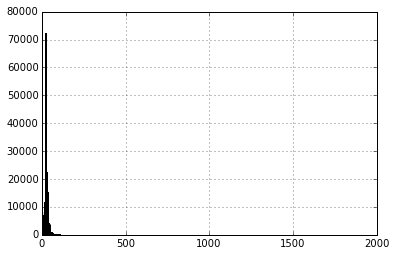

In [12]:
segments.seg_length.hist(bins=500)

Though most of the transits appear to be short, there are a few longer distances that make the plot difficult to read. This is where a transformation is useful:

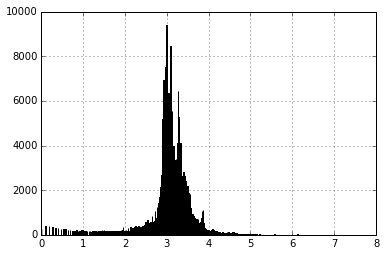

In [13]:
segments.seg_length.apply(np.log).hist(bins=500)

We can see that although there are date/time fields in the dataset, they are not in any specialized format, such as `datetime`.

In [14]:
segments.st_time.dtype

dtype('O')

Our first order of business will be to convert these data to `datetime`. The `strptime` method parses a string representation of a date and/or time field, according to the expected format of this information.

In [15]:
datetime.strptime(segments.st_time.ix[0], '%m/%d/%y %H:%M')

datetime.datetime(2009, 2, 10, 16, 3)

The `dateutil` package includes a parser that attempts to detect the format of the date strings, and convert them automatically.

In [16]:
from dateutil.parser import parse

In [17]:
parse(segments.st_time.ix[0])

datetime.datetime(2009, 2, 10, 16, 3)

We can convert all the dates in a particular column by using the `apply` method.

In [18]:
segments.st_time.apply(lambda d: datetime.strptime(d, '%m/%d/%y %H:%M'))

0   2009-02-10 16:03:00
1   2009-04-06 14:31:00
2   2009-04-06 14:36:00
3   2009-04-10 17:58:00
4   2009-04-10 17:59:00
5   2010-03-20 16:06:00
6   2010-03-20 18:05:00
7   2011-05-04 11:28:00
8   2010-06-05 11:23:00
9   2010-06-08 11:03:00
...
262515   2010-05-31 14:27:00
262516   2010-06-05 05:25:00
262517   2010-06-27 02:35:00
262518   2010-07-01 03:49:00
262519   2010-07-02 03:30:00
262520   2010-06-13 10:32:00
262521   2010-06-15 12:49:00
262522   2010-06-15 21:32:00
262523   2010-06-17 19:16:00
262524   2010-06-18 02:52:00
262525   2010-06-18 10:19:00
Name: st_time, Length: 262526, dtype: datetime64[ns]

As a convenience, Pandas has a `to_datetime` method that will parse and convert an entire Series of formatted strings into `datetime` objects.

In [19]:
pd.to_datetime(segments.st_time)

0   2009-02-10 16:03:00
1   2009-04-06 14:31:00
2   2009-04-06 14:36:00
3   2009-04-10 17:58:00
4   2009-04-10 17:59:00
5   2010-03-20 16:06:00
6   2010-03-20 18:05:00
7   2011-05-04 11:28:00
8   2010-06-05 11:23:00
9   2010-06-08 11:03:00
...
262515   2010-05-31 14:27:00
262516   2010-06-05 05:25:00
262517   2010-06-27 02:35:00
262518   2010-07-01 03:49:00
262519   2010-07-02 03:30:00
262520   2010-06-13 10:32:00
262521   2010-06-15 12:49:00
262522   2010-06-15 21:32:00
262523   2010-06-17 19:16:00
262524   2010-06-18 02:52:00
262525   2010-06-18 10:19:00
Name: st_time, Length: 262526, dtype: datetime64[ns]

Pandas also has a custom NA value for missing datetime objects, `NaT`.

In [20]:
pd.to_datetime([None])

<class 'pandas.tseries.index.DatetimeIndex'>
[NaT]
Length: 1, Freq: None, Timezone: None

Also, if `to_datetime()` has problems parsing any particular date/time format, you can pass the spec in using the `format=` argument.

## Merging and joining DataFrame objects

Now that we have the vessel transit information as we need it, we may want a little more information regarding the vessels themselves. In the `data/AIS` folder there is a second table that contains information about each of the ships that traveled the segments in the `segments` table.

In [21]:
vessels = pd.read_csv("data/AIS/vessel_information.csv", index_col='mmsi')
vessels.head()

      num_names                                              names sov  \
mmsi                                                                     
1             8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y   
9             3                         000000009/Raven/Shearwater   N   
21            1                                      Us Gov Vessel   Y   
74            2                                  Mcfaul/Sarah Bell   N   
103           3           Ron G/Us Navy Warship 103/Us Warship 103   Y   

         flag flag_type  num_loas                                    loa  \
mmsi                                                                       
1     Unknown   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0   
9     Unknown   Unknown         2                              50.0/62.0   
21    Unknown   Unknown         1                                  208.0   
74    Unknown   Unknown         1                                  155.0   
103   Unknown   Unknown  

In [22]:
[v for v in vessels.type.unique() if v.find('/')==-1]

['Unknown',
 'Other',
 'Tug',
 'Towing',
 'Pleasure',
 'Cargo',
 'WIG',
 'Fishing',
 'BigTow',
 'MilOps',
 'Tanker',
 'Passenger',
 'SAR',
 'Sailing',
 'Reserved',
 'Law',
 'Dredging',
 'AntiPol',
 'Pilot',
 'HSC',
 'Diving',
 'Resol-18',
 'Tender',
 'Spare',
 'Medical']

In [23]:
vessels.type.value_counts()

Cargo        5622
Tanker       2440
Pleasure      601
Tug           221
Sailing       205
Fishing       200
Other         178
Passenger     150
Towing        117
Unknown       106
...
BigTow/Tanker/Towing/Tug          1
Fishing/SAR/Unknown               1
BigTow/Reserved/Towing/Tug/WIG    1
Reserved/Tanker/Towing/Tug        1
Cargo/Reserved/Unknown            1
Reserved/Towing/Tug               1
BigTow/Unknown                    1
Fishing/Law                       1
BigTow/Towing/WIG                 1
Towing/Unknown/WIG                1
AntiPol/Fishing/Pleasure          1
Length: 206, dtype: int64

The challenge, however, is that several ships have travelled multiple segments, so there is not a one-to-one relationship between the rows of the two tables. The table of vessel information has a *one-to-many* relationship with the segments.

In Pandas, we can combine tables according to the value of one or more *keys* that are used to identify rows, much like an index. Using a trivial example:

In [24]:
df1 = pd.DataFrame(dict(id=range(4), age=np.random.randint(18, 31, size=4)))
df2 = pd.DataFrame(dict(id=range(3)+range(3), score=np.random.random(size=6)))

df1, df2

(   age  id
 0   24   0
 1   25   1
 2   25   2
 3   30   3,    id     score
 0   0  0.068840
 1   1  0.784715
 2   2  0.590726
 3   0  0.892117
 4   1  0.506912
 5   2  0.721110)

In [25]:
pd.merge(df1, df2)

   age  id     score
0   24   0  0.068840
1   24   0  0.892117
2   25   1  0.784715
3   25   1  0.506912
4   25   2  0.590726
5   25   2  0.721110

Notice that without any information about which column to use as a key, Pandas did the right thing and used the `id` column in both tables. Unless specified otherwise, `merge` will used any common column names as keys for merging the tables. 

Notice also that `id=3` from `df1` was omitted from the merged table. This is because, by default, `merge` performs an **inner join** on the tables, meaning that the merged table represents an intersection of the two tables.

In [26]:
pd.merge(df1, df2, how='outer')

   age  id     score
0   24   0  0.068840
1   24   0  0.892117
2   25   1  0.784715
3   25   1  0.506912
4   25   2  0.590726
5   25   2  0.721110
6   30   3       NaN

The **outer join** above yields the union of the two tables, so all rows are represented, with missing values inserted as appropriate. One can also perform **right** and **left** joins to include all rows of the right or left table (*i.e.* first or second argument to `merge`), but not necessarily the other.

Looking at the two datasets that we wish to merge:

In [27]:
segments.head(1)

   mmsi         name  transit  segment  seg_length  avg_sog  min_sog  max_sog  \
0     1  Us Govt Ves        1        1         5.1     13.2      9.2     14.5   

   pdgt10        st_time       end_time  
0    96.5  2/10/09 16:03  2/10/09 16:27  

In [28]:
vessels.head(1)

      num_names                                              names sov  \
mmsi                                                                     
1             8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y   

         flag flag_type  num_loas                                    loa  \
mmsi                                                                       
1     Unknown   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0   

      max_loa  num_types                             type  
mmsi                                                       
1         156          4  Dredging/MilOps/Reserved/Towing  

we see that there is a `mmsi` value (a vessel identifier) in each table, but it is used as an index for the `vessels` table. In this case, we have to specify to join on the index for this table, and on the `mmsi` column for the other.

In [29]:
segments_merged = pd.merge(vessels, segments, left_index=True, right_on='mmsi')

In [30]:
segments_merged.head()

   num_names                                              names sov     flag  \
0          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
1          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
2          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
3          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
4          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   

  flag_type  num_loas                                    loa  max_loa  \
0   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0      156   
1   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0      156   
2   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0      156   
3   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0      156   
4   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0      156   

   num_types                             type  \
0          4  Dredging/MilOps/R

In this case, the default inner join is suitable; we are not interested in observations from either table that do not have corresponding entries in the other. 

Notice that `mmsi` field that was an index on the `vessels` table is no longer an index on the merged table.

Here, we used the `merge` function to perform the merge; we could also have used the `merge` method for either of the tables:

In [31]:
vessels.merge(segments, left_index=True, right_on='mmsi').head()

   num_names                                              names sov     flag  \
0          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
1          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
2          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
3          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
4          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   

  flag_type  num_loas                                    loa  max_loa  \
0   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0      156   
1   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0      156   
2   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0      156   
3   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0      156   
4   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0      156   

   num_types                             type  \
0          4  Dredging/MilOps/R

Occasionally, there will be fields with the same in both tables that we do not wish to use to join the tables; they may contain different information, despite having the same name. In this case, Pandas will by default append suffixes `_x` and `_y` to the columns to uniquely identify them.

In [32]:
segments['type'] = 'foo'
pd.merge(vessels, segments, left_index=True, right_on='mmsi').head()

   num_names                                              names sov     flag  \
0          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
1          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
2          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
3          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
4          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   

  flag_type  num_loas                                    loa  max_loa  \
0   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0      156   
1   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0      156   
2   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0      156   
3   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0      156   
4   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0      156   

   num_types                           type_x  \
0          4  Dredging/MilOps/R

This behavior can be overridden by specifying a `suffixes` argument, containing a list of the suffixes to be used for the columns of the left and right columns, respectively.

## Concatenation

A common data manipulation is appending rows or columns to a dataset that already conform to the dimensions of the exsiting rows or colums, respectively. In NumPy, this is done either with `concatenate` or the convenience functions `c_` and `r_`:

In [33]:
np.concatenate([np.random.random(5), np.random.random(5)])

array([ 0.95922038,  0.39563796,  0.13163705,  0.94429727,  0.01549658,
        0.12911028,  0.75731272,  0.01583536,  0.56940704,  0.34045001])

In [34]:
np.r_[np.random.random(5), np.random.random(5)]

array([ 0.80586099,  0.34971419,  0.39173205,  0.61992008,  0.64169057,
        0.31249921,  0.97907553,  0.18102001,  0.67703841,  0.25629399])

In [35]:
np.c_[np.random.random(5), np.random.random(5)]

array([[ 0.40759603,  0.66875812],
       [ 0.75010699,  0.64254533],
       [ 0.19492038,  0.04028105],
       [ 0.139481  ,  0.96799951],
       [ 0.81245418,  0.83274143]])

This operation is also called *binding* or *stacking*.

With Pandas' indexed data structures, there are additional considerations as the overlap in index values between two data structures affects how they are concatenate.

Lets import two microbiome datasets, each consisting of counts of microorganiams from a particular patient. We will use the first column of each dataset as the index.

In [36]:
mb1 = pd.read_excel('data/microbiome/MID1.xls', 'Sheet 1', index_col=0, header=None)
mb2 = pd.read_excel('data/microbiome/MID2.xls', 'Sheet 1', index_col=0, header=None)
mb1.shape, mb2.shape

((272, 1), (288, 1))

In [37]:
mb1.head()

                                                                                         1
0                                                                                         
Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera    7
Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus          2
Archaea "Crenarchaeota" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus              3
Archaea "Crenarchaeota" Thermoprotei Thermoproteales Thermofilaceae Thermofilum          3
Archaea "Euryarchaeota" "Methanomicrobia" Methanocellales Methanocellaceae Methanocella  7

Let's give the index and columns meaningful labels:

In [38]:
mb1.columns = mb2.columns = ['Count']

In [39]:
mb1.index.name = mb2.index.name = 'Taxon'

In [40]:
mb1.head()

                                                                                         Count
Taxon                                                                                         
Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera        7
Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus              2
Archaea "Crenarchaeota" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus                  3
Archaea "Crenarchaeota" Thermoprotei Thermoproteales Thermofilaceae Thermofilum              3
Archaea "Euryarchaeota" "Methanomicrobia" Methanocellales Methanocellaceae Methanocella      7

The index of these data is the unique biological classification of each organism, beginning with *domain*, *phylum*, *class*, and for some organisms, going all the way down to the genus level.

![classification](http://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Biological_classification_L_Pengo_vflip.svg/150px-Biological_classification_L_Pengo_vflip.svg.png)

In [41]:
mb1.index[:3]

Index([u'Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera', u'Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus', u'Archaea "Crenarchaeota" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus'], dtype='object')

In [42]:
mb1.index.is_unique

True

If we concatenate along `axis=0` (the default), we will obtain another data frame with the the rows concatenated:

In [43]:
pd.concat([mb1, mb2], axis=0).shape

(560, 1)

However, the index is no longer unique, due to overlap between the two DataFrames.

In [44]:
pd.concat([mb1, mb2], axis=0).index.is_unique

False

Concatenating along `axis=1` will concatenate column-wise, but respecting the indices of the two DataFrames.

In [45]:
pd.concat([mb1, mb2], axis=1).shape

(438, 2)

In [46]:
pd.concat([mb1, mb2], axis=1).head()

                                                                                            Count  \
Archaea "Crenarchaeota" Thermoprotei Acidilobales Acidilobaceae Acidilobus                    NaN   
Archaea "Crenarchaeota" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera               NaN   
Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera           7   
Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus    NaN   
Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Thermosphaera       NaN   

                                                                                            Count  
Archaea "Crenarchaeota" Thermoprotei Acidilobales Acidilobaceae Acidilobus                      2  
Archaea "Crenarchaeota" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera                14  
Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera        

In [47]:
pd.concat([mb1, mb2], axis=1).values[:5]

array([[ nan,   2.],
       [ nan,  14.],
       [  7.,  23.],
       [ nan,   1.],
       [ nan,   2.]])

If we are only interested in taxa that are included in both DataFrames, we can specify a `join=inner` argument.

In [48]:
pd.concat([mb1, mb2], axis=1, join='inner').head()

                                                                                         Count  \
Taxon                                                                                            
Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera        7   
Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus              2   
Archaea "Crenarchaeota" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus                  3   
Archaea "Crenarchaeota" Thermoprotei Thermoproteales Thermofilaceae Thermofilum              3   
Archaea "Euryarchaeota" "Methanomicrobia" Methanocellales Methanocellaceae Methanocella      7   

                                                                                         Count  
Taxon                                                                                           
Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera       23  
Archaea "Crenarchaeota

If we wanted to use the second table to fill values absent from the first table, we could use `combine_first`.

In [49]:
mb1.combine_first(mb2).head()

                                                                                            Count
Taxon                                                                                            
Archaea "Crenarchaeota" Thermoprotei Acidilobales Acidilobaceae Acidilobus                      2
Archaea "Crenarchaeota" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera                14
Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera           7
Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus      1
Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Thermosphaera         2

We can also create a hierarchical index based on keys identifying the original tables.

In [50]:
pd.concat([mb1, mb2], keys=['patient1', 'patient2']).head()

                                                                                                  Count
         Taxon                                                                                         
patient1 Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera        7
         Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus              2
         Archaea "Crenarchaeota" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus                  3
         Archaea "Crenarchaeota" Thermoprotei Thermoproteales Thermofilaceae Thermofilum              3
         Archaea "Euryarchaeota" "Methanomicrobia" Methanocellales Methanocellaceae Methanocella      7

In [51]:
pd.concat([mb1, mb2], keys=['patient1', 'patient2']).index.is_unique

True

Alternatively, you can pass keys to the concatenation by supplying the DataFrames (or Series) as a dict.

In [52]:
pd.concat(dict(patient1=mb1, patient2=mb2), axis=1).head()

                                                                                            patient1  \
                                                                                               Count   
Archaea "Crenarchaeota" Thermoprotei Acidilobales Acidilobaceae Acidilobus                       NaN   
Archaea "Crenarchaeota" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera                  NaN   
Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera              7   
Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus       NaN   
Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Thermosphaera          NaN   

                                                                                            patient2  
                                                                                               Count  
Archaea "Crenarchaeota" Thermoprotei Acidilobales Acidilobaceae A

If you want `concat` to work like `numpy.concatanate`, you may provide the `ignore_index=True` argument.

## Exercise

In the *data/microbiome* subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10th file that describes the content of each. Write code that imports each of the data spreadsheets and combines them into a single `DataFrame`, adding the identifying information from the metadata spreadsheet as columns in the combined `DataFrame`.

In [52]:
# Write your answer here

## Reshaping DataFrame objects

In the context of a single DataFrame, we are often interested in re-arranging the layout of our data. 

This dataset in from Table 6.9 of [Statistical Methods for the Analysis of Repeated Measurements](http://www.amazon.com/Statistical-Methods-Analysis-Repeated-Measurements/dp/0387953701) by Charles S. Davis, pp. 161-163 (Springer, 2002). These data are from a multicenter, randomized controlled trial of botulinum toxin type B (BotB) in patients with cervical dystonia from nine U.S. sites.

* Randomized to placebo (N=36), 5000 units of BotB (N=36), 10,000 units of BotB (N=37)
* Response variable: total score on Toronto Western Spasmodic Torticollis Rating Scale (TWSTRS), measuring severity, pain, and disability of cervical dystonia (high scores mean more impairment)
* TWSTRS measured at baseline (week 0) and weeks 2, 4, 8, 12, 16 after treatment began

In [53]:
cdystonia = pd.read_csv("data/cdystonia.csv", index_col=None)
cdystonia.head()

   patient  obs  week  site  id  treat  age sex  twstrs
0        1    1     0     1   1  5000U   65   F      32
1        1    2     2     1   1  5000U   65   F      30
2        1    3     4     1   1  5000U   65   F      24
3        1    4     8     1   1  5000U   65   F      37
4        1    5    12     1   1  5000U   65   F      39

This dataset includes repeated measurements of the same individuals (longitudinal data). Its possible to present such information in (at least) two ways: showing each repeated measurement in their own row, or in multiple columns representing mutliple measurements.


The `stack` method rotates the data frame so that columns are represented in rows:

In [54]:
stacked = cdystonia.stack()
stacked

0  patient        1
   obs            1
   week           0
   site           1
   id             1
   treat      5000U
   age           65
   sex            F
   twstrs        32
1  patient        1
...
629  sex            M
     twstrs        36
630  patient      109
     obs            6
     week          16
     site           9
     id            11
     treat      5000U
     age           57
     sex            M
     twstrs        51
Length: 5679, dtype: object

To complement this, `unstack` pivots from rows back to columns.

In [55]:
stacked.unstack().head()

  patient obs week site id  treat age sex twstrs
0       1   1    0    1  1  5000U  65   F     32
1       1   2    2    1  1  5000U  65   F     30
2       1   3    4    1  1  5000U  65   F     24
3       1   4    8    1  1  5000U  65   F     37
4       1   5   12    1  1  5000U  65   F     39

For this dataset, it makes sense to create a hierarchical index based on the patient and observation:

In [56]:
cdystonia2 = cdystonia.set_index(['patient','obs'])
cdystonia2.head()

             week  site  id  treat  age sex  twstrs
patient obs                                        
1       1       0     1   1  5000U   65   F      32
        2       2     1   1  5000U   65   F      30
        3       4     1   1  5000U   65   F      24
        4       8     1   1  5000U   65   F      37
        5      12     1   1  5000U   65   F      39

In [57]:
cdystonia2.index.is_unique

True

If we want to transform this data so that repeated measurements are in columns, we can `unstack` the `twstrs` measurements according to `obs`.

In [58]:
twstrs_wide = cdystonia2['twstrs'].unstack('obs')
twstrs_wide.head()

obs       1   2   3   4   5   6
patient                        
1        32  30  24  37  39  36
2        60  26  27  41  65  67
3        44  20  23  26  35  35
4        53  61  64  62 NaN NaN
5        53  35  48  49  41  51

In [59]:
cdystonia_long = cdystonia[['patient','site','id','treat','age','sex']].drop_duplicates().merge(
                    twstrs_wide, right_index=True, left_on='patient', how='inner').head()
cdystonia_long

    patient  site  id    treat  age sex   1   2   3   4   5   6
0         1     1   1    5000U   65   F  32  30  24  37  39  36
6         2     1   2   10000U   70   F  60  26  27  41  65  67
12        3     1   3    5000U   64   F  44  20  23  26  35  35
18        4     1   4  Placebo   59   F  53  61  64  62 NaN NaN
22        5     1   5   10000U   76   F  53  35  48  49  41  51

A slightly cleaner way of doing this is to set the patient-level information as an index before unstacking:

In [60]:
cdystonia.set_index(['patient','site','id','treat','age','sex','week'])['twstrs'].unstack('week').head()

week                             0   2   4   8   12  16
patient site id treat   age sex                        
1       1    1  5000U   65  F    32  30  24  37  39  36
2       1    2  10000U  70  F    60  26  27  41  65  67
3       1    3  5000U   64  F    44  20  23  26  35  35
4       1    4  Placebo 59  F    53  61  64  62 NaN NaN
5       1    5  10000U  76  F    53  35  48  49  41  51

To convert our "wide" format back to long, we can use the `melt` function, appropriately parameterized:

In [61]:
pd.melt(cdystonia_long, id_vars=['patient','site','id','treat','age','sex'], 
        var_name='obs', value_name='twsters').head()

   patient  site  id    treat  age sex obs  twsters
0        1     1   1    5000U   65   F   1       32
1        2     1   2   10000U   70   F   1       60
2        3     1   3    5000U   64   F   1       44
3        4     1   4  Placebo   59   F   1       53
4        5     1   5   10000U   76   F   1       53

This illustrates the two formats for longitudinal data: **long** and **wide** formats. Its typically better to store data in long format because additional data can be included as additional rows in the database, while wide format requires that the entire database schema be altered by adding columns to every row as data are collected.

The preferable format for analysis depends entirely on what is planned for the data, so it is imporant to be able to move easily between them.

## Pivoting

The `pivot` method allows a DataFrame to be transformed easily between long and wide formats in the same way as a pivot table is created in a spreadsheet. It takes three arguments: `index`, `columns` and `values`, corresponding to the DataFrame index (the row headers), columns and cell values, respectively.

For example, we may want the `twstrs` variable (the response variable) in wide format according to patient:

In [62]:
cdystonia.pivot(index='patient', columns='obs', values='twstrs').head()

obs       1   2   3   4   5   6
patient                        
1        32  30  24  37  39  36
2        60  26  27  41  65  67
3        44  20  23  26  35  35
4        53  61  64  62 NaN NaN
5        53  35  48  49  41  51

If we omit the `values` argument, we get a `DataFrame` with hierarchical columns, just as when we applied `unstack` to the hierarchically-indexed table:

In [63]:
cdystonia.pivot('patient', 'obs')

         week                      site             ...  sex                 \
obs         1   2   3   4   5   6     1   2   3   4 ...    3    4    5    6   
patient                                             ...                       
1           0   2   4   8  12  16     1   1   1   1 ...    F    F    F    F   
2           0   2   4   8  12  16     1   1   1   1 ...    F    F    F    F   
3           0   2   4   8  12  16     1   1   1   1 ...    F    F    F    F   
4           0   2   4   8 NaN NaN     1   1   1   1 ...    F    F  NaN  NaN   
5           0   2   4   8  12  16     1   1   1   1 ...    F    F    F    F   
6           0   2   4   8  12  16     1   1   1   1 ...    F    F    F    F   
7           0   2   4   8  12  16     1   1   1   1 ...    M    M    M    M   
8           0   2   4   8  12  16     1   1   1   1 ...    M    M    M    M   
9           0   2   4   8  12  16     1   1   1   1 ...    F    F    F    F   
10          0   2   4   8  12  16     1   1   1   1 

A related method, `pivot_table`, creates a spreadsheet-like table with a hierarchical index, and allows the values of the table to be populated using an arbitrary aggregation function.

In [64]:
cdystonia.pivot_table(rows=['site', 'treat'], cols='week', values='twstrs', aggfunc=max).head(20)

/usr/local/lib/python2.7/site-packages/pandas/util/decorators.py:53: FutureWarning: cols is deprecated, use columns instead
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python2.7/site-packages/pandas/util/decorators.py:53: FutureWarning: rows is deprecated, use index instead
  warnings.warn(msg, FutureWarning)


week          0   2   4   8   12  16
site treat                          
1    10000U   60  41  48  49  65  67
     5000U    44  32  34  43  42  46
     Placebo  53  61  64  62  32  38
2    10000U   65  60  60  64  67  66
     5000U    67  64  65  64  62  64
     Placebo  53  56  52  57  61  54
3    10000U   50  43  51  46  49  56
     5000U    52  44  47  50  50  49
     Placebo  43  38  40  48  49  44
4    10000U   54  52  52  54  51  57
     5000U    52  34  43  45  47  46
     Placebo  52  55  51  52  54  57
5    10000U   50  50  32  46  54  57
     5000U    60  53  55  62  67  26
     Placebo  60  57  53  52  53  58
6    10000U   55  56  47  53  51  51
     5000U    59  55  50  56  59  53
     Placebo  54  53  51  57  57  57
7    10000U   53  47  45  45  50  53
     5000U    53  45  52  51  52  53

For a simple cross-tabulation of group frequencies, the `crosstab` function (not a method) aggregates counts of data according to factors in rows and columns. The factors may be hierarchical if desired.

In [65]:
pd.crosstab(cdystonia.sex, cdystonia.site)

site   1   2   3   4   5   6   7   8   9
sex                                     
F     52  53  42  30  22  54  66  48  28
M     18  29  30  18  11  33   6  58  33

## Data transformation

There are a slew of additional operations for DataFrames that we would collectively refer to as "transformations" that include tasks such as removing duplicate values, replacing values, and grouping values.

### Dealing with duplicates

We can easily identify and remove duplicate values from `DataFrame` objects. For example, say we want to removed ships from our `vessels` dataset that have the same name:

In [66]:
vessels.duplicated(cols='names')

/usr/local/lib/python2.7/site-packages/pandas/util/decorators.py:53: FutureWarning: cols is deprecated, use subset instead
  warnings.warn(msg, FutureWarning)


mmsi
1        False
9        False
21       False
74       False
103      False
310      False
3011     False
4731     False
15151    False
46809    False
...
812719000    False
857632392    False
866946820     True
888888882     True
888888888    False
900000000    False
919191919    False
967191190     True
975318642     True
987654321    False
999999999     True
Length: 10771, dtype: bool

In [67]:
vessels.drop_duplicates(['names'])

           num_names                                              names sov  \
mmsi                                                                          
1                  8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y   
9                  3                         000000009/Raven/Shearwater   N   
21                 1                                      Us Gov Vessel   Y   
74                 2                                  Mcfaul/Sarah Bell   N   
103                3           Ron G/Us Navy Warship 103/Us Warship 103   Y   
310                1                                           Arabella   N   
3011               1                                         Charleston   N   
4731               1                                          000004731   N   
15151              2                             R L Enterkin/Us Vessel   N   
46809              1                                      Island Trader   N   
80404              1                                

### Value replacement

Frequently, we get data columns that are encoded as strings that we wish to represent numerically for the purposes of including it in a quantitative analysis. For example, consider the treatment variable in the cervical dystonia dataset:

In [68]:
cdystonia.treat.value_counts()

10000U     213
5000U      211
Placebo    207
dtype: int64

A logical way to specify these numerically is to change them to integer values, perhaps using "Placebo" as a baseline value. If we create a dict with the original values as keys and the replacements as values, we can pass it to the `map` method to implement the changes.

In [69]:
treatment_map = {'Placebo': 0, '5000U': 1, '10000U': 2}

In [70]:
cdystonia['treatment'] = cdystonia.treat.map(treatment_map)
cdystonia.treatment

0    1
1    1
2    1
3    1
4    1
5    1
6    2
7    2
8    2
9    2
...
620    2
621    2
622    2
623    2
624    2
625    2
626    1
627    1
628    1
629    1
630    1
Name: treatment, Length: 631, dtype: int64

Alternately, if we simply want to replace particular values in a `Series` or `DataFrame`, we can use the `replace` method. 

An example where replacement is useful is dealing with zeros in certain transformations. For example, if we try to take the log of a set of values:

In [71]:
vals = pd.Series([float(i)**10 for i in range(10)])
vals

0             0
1             1
2          1024
3         59049
4       1048576
5       9765625
6      60466176
7     282475249
8    1073741824
9    3486784401
dtype: float64

In [72]:
np.log(vals)

0         -inf
1     0.000000
2     6.931472
3    10.986123
4    13.862944
5    16.094379
6    17.917595
7    19.459101
8    20.794415
9    21.972246
dtype: float64

In such situations, we can replace the zero with a value so small that it makes no difference to the ensuing analysis. We can do this with `replace`.

In [73]:
vals = vals.replace(0, 1e-6)
np.log(vals)

0   -13.815511
1     0.000000
2     6.931472
3    10.986123
4    13.862944
5    16.094379
6    17.917595
7    19.459101
8    20.794415
9    21.972246
dtype: float64

We can also perform the same replacement that we used `map` for with `replace`:

In [74]:
cdystonia2.treat.replace({'Placebo': 0, '5000U': 1, '10000U': 2})

patient  obs
1        1      1
         2      1
         3      1
         4      1
         5      1
         6      1
2        1      2
         2      2
         3      2
         4      2
...
108      1      2
         2      2
         3      2
         4      2
         5      2
         6      2
109      1      1
         2      1
         4      1
         5      1
         6      1
Name: treat, Length: 631, dtype: int64

### Inidcator variables

For some statistical analyses (*e.g.* regression models or analyses of variance), categorical or group variables need to be converted into columns of indicators--zeros and ones--to create a so-called **design matrix**. The Pandas function `get_dummies` (indicator variables are also known as *dummy variables*) makes this transformation straightforward.

Let's consider the DataFrame containing the ships corresponding to the transit segments on the eastern seaboard. The `type` variable denotes the class of vessel; we can create a matrix of indicators for this. For simplicity, lets filter out the 5 most common types of ships:


In [75]:
top5 = vessels.type.apply(lambda s: s in vessels.type.value_counts().index[:5])
vessels5 = vessels[top5]

In [76]:
pd.get_dummies(vessels5.type).head(10)

         Cargo  Pleasure  Sailing  Tanker  Tug
mmsi                                          
15151        0         0        0       0    1
80404        0         1        0       0    0
366235       1         0        0       0    0
587370       0         0        0       0    1
693559       0         0        0       0    1
1233916      0         1        0       0    0
3041300      1         0        0       0    0
3663760      1         0        0       0    0
3688360      1         0        0       0    0
7718175      1         0        0       0    0

### Discretization

Pandas' `cut` function can be used to group continuous or countable data in to bins. Discretization is generally a very **bad idea** for statistical analysis, so use this function responsibly!

Lets say we want to bin the ages of the cervical dystonia patients into a smaller number of groups:

In [77]:
cdystonia.age.describe()

count    631.000000
mean      55.616482
std       12.123910
min       26.000000
25%       46.000000
50%       56.000000
75%       65.000000
max       83.000000
dtype: float64

Let's transform these data into decades, beginnnig with individuals in their 20's and ending with those in their 90's:

In [78]:
pd.cut(cdystonia.age, [20,30,40,50,60,70,80,90])[:30]

 (60, 70]
 (60, 70]
 (60, 70]
 (60, 70]
 (60, 70]
 (60, 70]
 (60, 70]
 (60, 70]
 (60, 70]
 (60, 70]
...
 (50, 60]
 (50, 60]
 (50, 60]
 (70, 80]
 (70, 80]
 (70, 80]
 (70, 80]
 (70, 80]
 (70, 80]
 (50, 60]
 (50, 60]
Levels (7): Index(['(20, 30]', '(30, 40]', '(40, 50]', '(50, 60]',
                   '(60, 70]', '(70, 80]', '(80, 90]'], dtype=object)
Length: 30

The parentheses indicate an open interval, meaning that the interval includes values up to but *not including* the endpoint, whereas the square bracket is a closed interval, where the endpoint is included in the interval. We can switch the closure to the left side by setting the `right` flag to `False`:

In [79]:
pd.cut(cdystonia.age, [20,30,40,50,60,70,80,90], right=False)[:30]

 [60, 70)
 [60, 70)
 [60, 70)
 [60, 70)
 [60, 70)
 [60, 70)
 [70, 80)
 [70, 80)
 [70, 80)
 [70, 80)
...
 [50, 60)
 [50, 60)
 [50, 60)
 [70, 80)
 [70, 80)
 [70, 80)
 [70, 80)
 [70, 80)
 [70, 80)
 [50, 60)
 [50, 60)
Levels (7): Index(['[20, 30)', '[30, 40)', '[40, 50)', '[50, 60)',
                   '[60, 70)', '[70, 80)', '[80, 90)'], dtype=object)
Length: 30

Since the data are now **ordinal**, rather than numeric, we can give them labels:

In [80]:
pd.cut(cdystonia.age, [20,40,60,80,90], labels=['young','middle-aged','old','ancient'])[:30]

 old
 old
 old
 old
 old
 old
 old
 old
 old
 old
...
 middle-aged
 middle-aged
 middle-aged
         old
         old
         old
         old
         old
         old
 middle-aged
 middle-aged
Levels (4): Index(['young', 'middle-aged', 'old', 'ancient'], dtype=object)
Length: 30

A related function `qcut` uses empirical quantiles to divide the data. If, for example, we want the quartiles -- (0-25%], (25-50%], (50-70%], (75-100%] -- we can just specify 4 intervals, which will be equally-spaced by default:

In [81]:
pd.qcut(cdystonia.age, 4)[:30]

 (56, 65]
 (56, 65]
 (56, 65]
 (56, 65]
 (56, 65]
 (56, 65]
 (65, 83]
 (65, 83]
 (65, 83]
 (65, 83]
...
 (56, 65]
 (56, 65]
 (56, 65]
 (65, 83]
 (65, 83]
 (65, 83]
 (65, 83]
 (65, 83]
 (65, 83]
 (56, 65]
 (56, 65]
Levels (4): Index(['[26, 46]', '(46, 56]', '(56, 65]', '(65, 83]'], dtype=object)
Length: 30

Alternatively, one can specify custom quantiles to act as cut points:

In [82]:
quantiles = pd.qcut(segments.seg_length, [0, 0.01, 0.05, 0.95, 0.99, 1])
quantiles[:30]

   (1.8, 7.8]
  (7.8, 45.4]
   (1.8, 7.8]
  (7.8, 45.4]
  (7.8, 45.4]
  (7.8, 45.4]
 (45.4, 89.7]
  (7.8, 45.4]
  (7.8, 45.4]
  (7.8, 45.4]
...
 (7.8, 45.4]
  (1.8, 7.8]
  (1.8, 7.8]
 (7.8, 45.4]
 (7.8, 45.4]
 (7.8, 45.4]
 (7.8, 45.4]
 (7.8, 45.4]
 (7.8, 45.4]
 (7.8, 45.4]
 (7.8, 45.4]
Levels (5): Index(['[1, 1.8]', '(1.8, 7.8]', '(7.8, 45.4]',
                   '(45.4, 89.7]', '(89.7, 1882]'], dtype=object)
Length: 30

Note that you can easily combine discretiztion with the generation of indicator variables shown above:

In [83]:
pd.get_dummies(quantiles).head(10)

   (1.8, 7.8]  (45.4, 89.7]  (7.8, 45.4]  (89.7, 1882]  [1, 1.8]
0           1             0            0             0         0
1           0             0            1             0         0
2           1             0            0             0         0
3           0             0            1             0         0
4           0             0            1             0         0
5           0             0            1             0         0
6           0             1            0             0         0
7           0             0            1             0         0
8           0             0            1             0         0
9           0             0            1             0         0

### Permutation and sampling

For some data analysis tasks, such as simulation, we need to be able to randomly reorder our data, or draw random values from it. Calling NumPy's `permutation` function with the length of the sequence you want to permute generates an array with a permuted sequence of integers, which can be used to re-order the sequence.

In [84]:
new_order = np.random.permutation(len(segments))
new_order[:30]

array([183316, 108225,  92326,  60611, 134460, 170622, 117439,  13979,
       243115,  69470,  13594, 160103,  73039, 158974, 220079,  20341,
        87882,   4430, 139083,  23082,  18110, 169543, 169578, 119516,
       227857, 123216, 252938,  52744,  88292, 208914])

Using this sequence as an argument to the `take` method results in a reordered DataFrame:

In [85]:
segments.take(new_order).head()

             mmsi           name  transit  segment  seg_length  avg_sog  \
183316  367839000    Us Epa Bold       14        1        17.9      6.0   
108225  366739960       Mckinley      135        1        26.9      8.1   
92326   354591000   Pyxis Leader       30        1        30.3     14.9   
60611   309942000     Dole Chile      178        1        18.5     19.0   
134460  366997360  Norwegian Sea      201        1        25.9      6.9   

        min_sog  max_sog  pdgt10         st_time       end_time type  
183316      5.3      7.1     0.0    7/19/09 7:00   7/19/09 9:23  foo  
108225      7.7      8.7     0.0  10/13/10 22:06  10/14/10 1:23  foo  
92326       7.2     17.2    94.4    8/3/10 22:58    8/4/10 0:59  foo  
60611      15.5     19.8   100.0     5/8/12 4:27    5/8/12 5:26  foo  
134460      6.5      7.1     0.0    4/3/12 10:40   4/3/12 14:26  foo  

Compare this ordering with the original:

In [86]:
segments.head()

   mmsi               name  transit  segment  seg_length  avg_sog  min_sog  \
0     1        Us Govt Ves        1        1         5.1     13.2      9.2   
1     1  Dredge Capt Frank        1        1        13.5     18.6     10.4   
2     1      Us Gov Vessel        1        1         4.3     16.2     10.3   
3     1      Us Gov Vessel        2        1         9.2     15.4     14.5   
4     1  Dredge Capt Frank        2        1         9.2     15.4     14.6   

   max_sog  pdgt10        st_time       end_time type  
0     14.5    96.5  2/10/09 16:03  2/10/09 16:27  foo  
1     20.6   100.0   4/6/09 14:31   4/6/09 15:20  foo  
2     20.5   100.0   4/6/09 14:36   4/6/09 14:55  foo  
3     16.1   100.0  4/10/09 17:58  4/10/09 18:34  foo  
4     16.2   100.0  4/10/09 17:59  4/10/09 18:35  foo  

## Exercise

Its easy to see how this permutation approach allows us to draw a random sample **without replacement**. How would you sample **with replacement**? Generate a random sample of 5 ships from the `vessels` DataFrame using this scheme.

In [86]:
# Write your answer here

## Data aggregation and GroupBy operations

One of the most powerful features of Pandas is its **GroupBy** functionality. On occasion we may want to perform operations on *groups* of observations within a dataset. For exmaple:

* **aggregation**, such as computing the sum of mean of each group, which involves applying a function to each group and returning the aggregated results
* **slicing** the DataFrame into groups and then doing something with the resulting slices (*e.g.* plotting)
* group-wise **transformation**, such as standardization/normalization

In [87]:
cdystonia_grouped = cdystonia.groupby(cdystonia.patient)

This *grouped* dataset is hard to visualize



In [88]:
cdystonia_grouped

However, the grouping is only an intermediate step; for example, we may want to **iterate** over each of the patient groups:

In [89]:
for patient, group in cdystonia_grouped:
    print patient
    print group
    print

1
   patient  obs  week  site  id  treat  age sex  twstrs  treatment
0        1    1     0     1   1  5000U   65   F      32          1
1        1    2     2     1   1  5000U   65   F      30          1
2        1    3     4     1   1  5000U   65   F      24          1
3        1    4     8     1   1  5000U   65   F      37          1
4        1    5    12     1   1  5000U   65   F      39          1
5        1    6    16     1   1  5000U   65   F      36          1

2
    patient  obs  week  site  id   treat  age sex  twstrs  treatment
6         2    1     0     1   2  10000U   70   F      60          2
7         2    2     2     1   2  10000U   70   F      26          2
8         2    3     4     1   2  10000U   70   F      27          2
9         2    4     8     1   2  10000U   70   F      41          2
10        2    5    12     1   2  10000U   70   F      65          2
11        2    6    16     1   2  10000U   70   F      67          2

3
    patient  obs  week  site  id  treat 

A common data analysis procedure is the **split-apply-combine** operation, which groups subsets of data together, applies a function to each of the groups, then recombines them into a new data table.

For example, we may want to aggregate our data with with some function.

![split-apply-combine](http://f.cl.ly/items/0s0Z252j0X0c3k3P1M47/Screen%20Shot%202013-06-02%20at%203.04.04%20PM.png)

<div align="right">*(figure taken from "Python for Data Analysis", p.251)*</div>

We can aggregate in Pandas using the `aggregate` (or `agg`, for short) method:

In [91]:
cdystonia_grouped.agg(np.mean).head()

         patient  obs  week  site  id  age     twstrs  treatment
patient                                                         
1              1  3.5   7.0     1   1   65  33.000000          1
2              2  3.5   7.0     1   2   70  47.666667          2
3              3  3.5   7.0     1   3   64  30.500000          1
4              4  2.5   3.5     1   4   59  60.000000          0
5              5  3.5   7.0     1   5   76  46.166667          2

Notice that the `treat` and `sex` variables are not included in the aggregation. Since it does not make sense to aggregate non-string variables, these columns are simply ignored by the method.

Some aggregation functions are so common that Pandas has a convenience method for them, such as `mean`:

In [92]:
cdystonia_grouped.mean().head()

         patient  obs  week  site  id  age     twstrs  treatment
patient                                                         
1              1  3.5   7.0     1   1   65  33.000000          1
2              2  3.5   7.0     1   2   70  47.666667          2
3              3  3.5   7.0     1   3   64  30.500000          1
4              4  2.5   3.5     1   4   59  60.000000          0
5              5  3.5   7.0     1   5   76  46.166667          2

The `add_prefix` and `add_suffix` methods can be used to give the columns of the resulting table labels that reflect the transformation:

In [93]:
cdystonia_grouped.mean().add_suffix('_mean').head()

         patient_mean  obs_mean  week_mean  site_mean  id_mean  age_mean  \
patient                                                                    
1                   1       3.5        7.0          1        1        65   
2                   2       3.5        7.0          1        2        70   
3                   3       3.5        7.0          1        3        64   
4                   4       2.5        3.5          1        4        59   
5                   5       3.5        7.0          1        5        76   

         twstrs_mean  treatment_mean  
patient                               
1          33.000000               1  
2          47.666667               2  
3          30.500000               1  
4          60.000000               0  
5          46.166667               2  

In [94]:
# The median of the `twstrs` variable
cdystonia_grouped['twstrs'].quantile(0.5)

patient
1          34.0
2          50.5
3          30.5
4          61.5
5          48.5
6          48.0
7          42.0
8          32.5
9          35.5
10         20.5
...
99         29.0
100        61.0
101        32.5
102        51.5
103        45.0
104        46.0
105        45.5
106        67.5
107        44.0
108        50.5
109        38.0
Name: twstrs, Length: 109, dtype: float64

If we wish, we can easily aggregate according to multiple keys:

In [95]:
cdystonia.groupby(['week','site']).mean().head()

           patient  obs   id        age     twstrs  treatment
week site                                                    
0    1         6.5    1  6.5  59.000000  43.083333   1.000000
     2        19.5    1  7.5  53.928571  51.857143   0.928571
     3        32.5    1  6.5  51.500000  38.750000   1.000000
     4        42.5    1  4.5  59.250000  48.125000   1.000000
     5        49.5    1  3.5  51.833333  49.333333   1.000000

Alternately, we can **transform** the data, using a function of our choice with the `transform` method:

In [96]:
normalize = lambda x: (x - x.mean())/x.std()

cdystonia_grouped.transform(normalize).head()

   patient       obs      week  site  id  age    twstrs  treatment
0      NaN -1.336306 -1.135550   NaN NaN  NaN -0.181369        NaN
1      NaN -0.801784 -0.811107   NaN NaN  NaN -0.544107        NaN
2      NaN -0.267261 -0.486664   NaN NaN  NaN -1.632322        NaN
3      NaN  0.267261  0.162221   NaN NaN  NaN  0.725476        NaN
4      NaN  0.801784  0.811107   NaN NaN  NaN  1.088214        NaN

It is easy to do column selection within `groupby` operations, if we are only interested split-apply-combine operations on a subset of columns:

In [97]:
cdystonia_grouped['twstrs'].mean().head()

patient
1          33.000000
2          47.666667
3          30.500000
4          60.000000
5          46.166667
Name: twstrs, dtype: float64

In [98]:
# This gives the same result as a DataFrame
cdystonia_grouped[['twstrs']].mean().head()

            twstrs
patient           
1        33.000000
2        47.666667
3        30.500000
4        60.000000
5        46.166667

If you simply want to divide your DataFrame into chunks for later use, its easy to convert them into a dict so that they can be easily indexed out as needed:

In [99]:
chunks = dict(list(cdystonia_grouped))

In [100]:
chunks[4]

    patient  obs  week  site  id    treat  age sex  twstrs  treatment
18        4    1     0     1   4  Placebo   59   F      53          0
19        4    2     2     1   4  Placebo   59   F      61          0
20        4    3     4     1   4  Placebo   59   F      64          0
21        4    4     8     1   4  Placebo   59   F      62          0

By default, `groupby` groups by row, but we can specify the `axis` argument to change this. For example, we can group our columns by type this way:

In [101]:
dict(list(cdystonia.groupby(cdystonia.dtypes, axis=1)))

{dtype('int64'):      patient  obs  week  site  id  age  twstrs  treatment
 0          1    1     0     1   1   65      32          1
 1          1    2     2     1   1   65      30          1
 2          1    3     4     1   1   65      24          1
 3          1    4     8     1   1   65      37          1
 4          1    5    12     1   1   65      39          1
 5          1    6    16     1   1   65      36          1
 6          2    1     0     1   2   70      60          2
 7          2    2     2     1   2   70      26          2
 8          2    3     4     1   2   70      27          2
 9          2    4     8     1   2   70      41          2
 10         2    5    12     1   2   70      65          2
 11         2    6    16     1   2   70      67          2
 ..       ...  ...   ...   ...  ..  ...     ...        ...
 619      107    6    16     9   9   50      52          2
 620      108    1     0     9  10   39      63          2
 621      108    2     2     9  10   39 

Its also possible to group by one or more levels of a hierarchical index. Recall `cdystonia2`, which we created with a hierarchical index:

In [102]:
cdystonia2.head(10)

             week  site  id   treat  age sex  twstrs
patient obs                                         
1       1       0     1   1   5000U   65   F      32
        2       2     1   1   5000U   65   F      30
        3       4     1   1   5000U   65   F      24
        4       8     1   1   5000U   65   F      37
        5      12     1   1   5000U   65   F      39
        6      16     1   1   5000U   65   F      36
2       1       0     1   2  10000U   70   F      60
        2       2     1   2  10000U   70   F      26
        3       4     1   2  10000U   70   F      27
        4       8     1   2  10000U   70   F      41

In [103]:
cdystonia2.groupby(level='obs', axis=0)['twstrs'].mean()

obs
1      45.651376
2      37.611650
3      37.066038
4      39.807692
5      42.913462
6      45.628571
Name: twstrs, dtype: float64

### Apply

We can generalize the split-apply-combine methodology by using `apply` function. This allows us to invoke any function we wish on a grouped dataset and recombine them into a DataFrame.

The function below takes a DataFrame and a column name, sorts by the column, and takes the `n` largest values of that column. We can use this with `apply` to return the largest values from every group in a DataFrame in a single call. 

In [104]:
def top(df, column, n=5):
    return df.sort_index(by=column, ascending=False)[:n]

To see this in action, consider the vessel transit segments dataset (which we merged with the vessel information to yield `segments_merged`). Say we wanted to return the 3 longest segments travelled by each ship:

In [105]:
top3segments = segments_merged.groupby('mmsi').apply(top, column='seg_length', n=3)[['names', 'seg_length']]
top3segments

                                                              names  \
mmsi                                                                  
1         6       Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   
          5       Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   
          7       Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   
9         15                             000000009/Raven/Shearwater   
          14                             000000009/Raven/Shearwater   
          13                             000000009/Raven/Shearwater   
21        16                                          Us Gov Vessel   
          25                                          Us Gov Vessel   
          30                                          Us Gov Vessel   
74        35                                      Mcfaul/Sarah Bell   
          34                                      Mcfaul/Sarah Bell   
103       37               Ron G/Us Navy Warship 103/Us Warship 103   
...   

Notice that additional arguments for the applied function can be passed via `apply` after the function name. It assumes that the DataFrame is the first argument.

In [106]:
top3segments.head(20)

                                                     names  seg_length
mmsi                                                                  
1    6   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        76.0
     5   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        17.4
     7   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        13.7
9    15                         000000009/Raven/Shearwater        47.2
     14                         000000009/Raven/Shearwater        31.4
     13                         000000009/Raven/Shearwater        19.3
21   16                                      Us Gov Vessel        48.7
     25                                      Us Gov Vessel        25.3
     30                                      Us Gov Vessel        21.7
74   35                                  Mcfaul/Sarah Bell         7.4
     34                                  Mcfaul/Sarah Bell         1.4
103  37           Ron G/Us Navy Warship 103/Us Warship 103        87.5
     4

Recall the microbiome data sets that we used previously for the concatenation example. Suppose that we wish to aggregate the data at a higher biological classification than genus. For example, we can identify samples down to *class*, which is the 3rd level of organization in each index.

In [107]:
mb1.index[:3]

Index([u'Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera', u'Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus', u'Archaea "Crenarchaeota" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus'], dtype='object')

Using the string methods `split` and `join` we can create an index that just uses the first three classifications: domain, phylum and class.

In [108]:
class_index = mb1.index.map(lambda x: ' '.join(x.split(' ')[:3]))

In [109]:
mb_class = mb1.copy()
mb_class.index = class_index

However, since there are multiple taxonomic units with the same class, our index is no longer unique:

In [110]:
mb_class.head()

                                           Count
Archaea "Crenarchaeota" Thermoprotei           7
Archaea "Crenarchaeota" Thermoprotei           2
Archaea "Crenarchaeota" Thermoprotei           3
Archaea "Crenarchaeota" Thermoprotei           3
Archaea "Euryarchaeota" "Methanomicrobia"      7

We can re-establish a unique index by summing all rows with the same class, using `groupby`:

In [111]:
mb_class.groupby(level=0).sum().head(10)

                                           Count
Archaea "Crenarchaeota" Thermoprotei          15
Archaea "Euryarchaeota" "Methanomicrobia"      9
Archaea "Euryarchaeota" Archaeoglobi           2
Archaea "Euryarchaeota" Halobacteria          12
Archaea "Euryarchaeota" Methanococci           1
Archaea "Euryarchaeota" Methanopyri           12
Archaea "Euryarchaeota" Thermoplasmata         2
Bacteria "Actinobacteria" Actinobacteria    1740
Bacteria "Aquificae" Aquificae                11
Bacteria "Bacteroidetes" "Bacteroidia"         1

### Exercise

Load the dataset in `titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [112]:
from IPython.core.display import HTML
HTML(filename='data/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


Women and children first?

1. Use the `groupby` method to calculate the proportion of passengers that survived by sex.
2. Calculate the same proportion, but by class and sex.
3. Create age categories: children (under 14 years), adolescents (14-20), adult (21-64), and senior(65+), and calculate survival proportions by age category, class and sex.

In [112]:
# Write your answer here